# Assignment 1
## E1 213 Pattern Recognition and Neural Networks

Umang Majumder

Mehul Darak

Soumyadeep Sarma


In [4]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import csv #builtin python library
import pandas as pd
import copy

# Regression

# Question 1

In [219]:
# Load the data
data = pd.read_csv('regression_data_multilinear_group_19_train.txt', delimiter = "\t")
nparray = data.to_numpy()
print(nparray.shape)
X = nparray[0:,0:10]
print(X.shape)
Y = nparray[0:,10:]
print(Y.shape)

(14000, 13)
(14000, 10)
(14000, 3)


In [220]:
# First append a constant term x_0 = 1 in X to include the bias
biased_X = np.c_[X, np.ones(X.shape[0])]

# Using OLS, we will find optimal W parameter vector that minimises the loss
W_optimal = np.linalg.inv(biased_X.T @ biased_X) @ (biased_X.T) @ (Y)

h_ols = biased_X.dot(W_optimal)
# We can separate the bias terms and parameters to find the bias explicitly
w = W_optimal[:-1]
w_0 = W_optimal[-1]
print (f"Bias: {w_0}") # w_0[i] represents bias for y[i]
print (f"Parameters: {w}") # w[i] represents paramters for x[i+1]



Bias: [-3.97177329  0.45521161  2.75877782]
Parameters: [[ 2.54148363  0.41374841  1.21212549]
 [-2.60004514 -2.63762996  1.18357058]
 [-3.58986134 -3.84859053  1.37358178]
 [-1.65641685 -0.03369487 -2.4428357 ]
 [-4.21931281 -3.49268353  2.49800551]
 [ 1.71504476  0.37762256 -2.05022232]
 [ 3.06911534 -1.1432722   2.10540456]
 [ 4.78501705  1.81001751 -4.34554266]
 [ 1.35827143 -1.27865283  1.847946  ]
 [-2.76354044  4.49214392  0.54072005]]


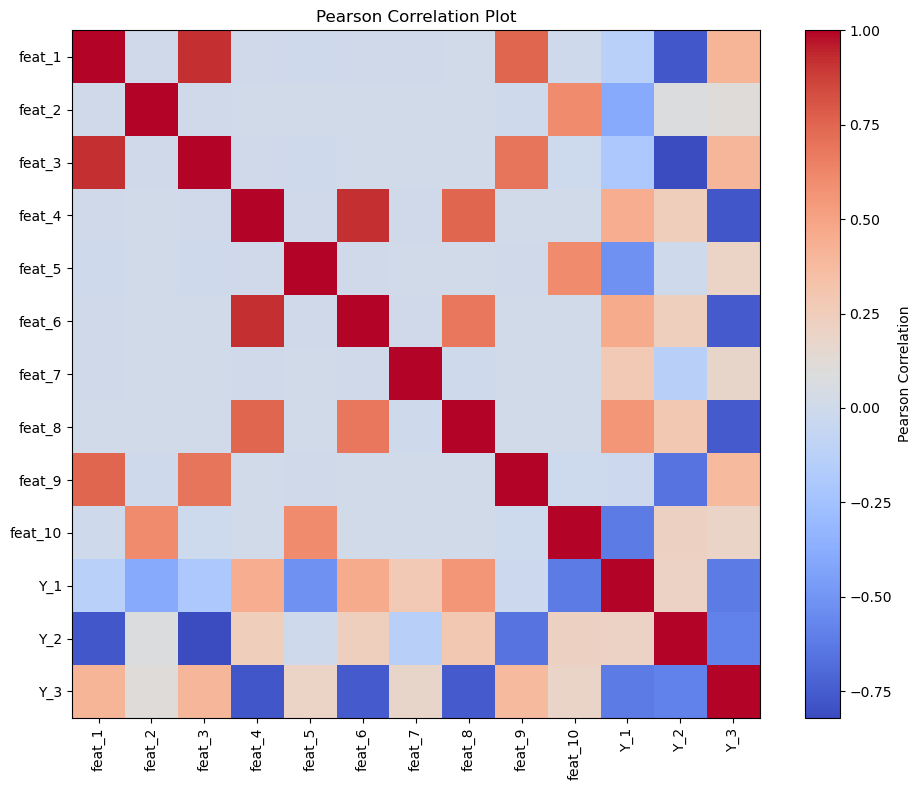

In [221]:
# Pearson Correlation Matrix:
pearson = data.corr()

# Plot PCM:
plt.figure(figsize=(10, 8))
plt.imshow(pearson, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Pearson Correlation')
plt.title('Pearson Correlation Plot')
plt.xticks(range(len(pearson.columns)), pearson.columns, rotation=90)
plt.yticks(range(len(pearson.index)), pearson.index)
plt.tight_layout()
plt.show()

In [222]:
#Pearson Correlation Coefficient:
def pcc(y1,y2):
    sd1 = np.std(y1)
    sd2 = np.std(y2)
    cov = np.cov(y1,y2)[0][1]
    return cov/(sd1*sd2)

PCC for Y1:  0.9652854828368085
PCC for Y2:  0.9467791447114309
PCC for Y3:  0.9748805693180695


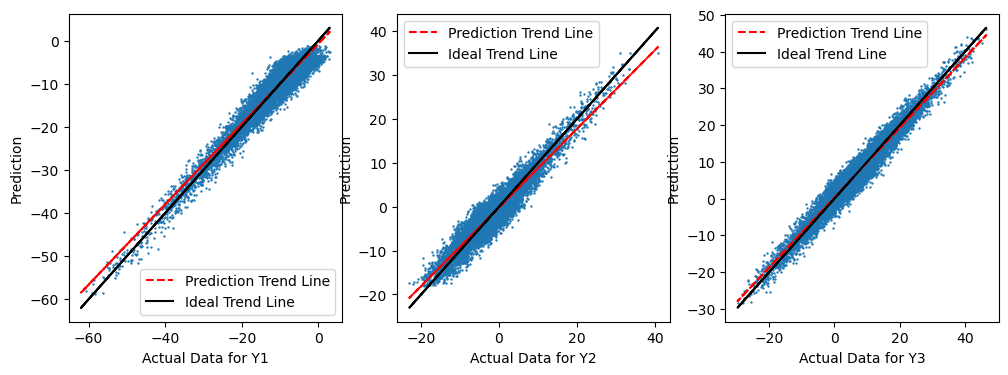

In [223]:
# We plot Y[i] vs h[i]
fig = plt.figure(figsize = (12,4) )


for i in range(3):
    ax3 = fig.add_subplot(1,3,i+1)
    ax3.scatter(Y[:,i], h_ols[:,i], s = 0.5)
    z = np.polyfit(Y[:,i], h_ols[:,i],1)
    p = np.poly1d(z)
    ax3.plot(Y[:,i],p(Y[:,i]),"r--", label = "Prediction Trend Line")
    ax3.plot(Y[:,i],Y[:,i], label = "Ideal Trend Line", color = "black")
    #fig.suptitle("example")DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated,
    #ax[0].scatter(x1, x2, y1, s = 0.5)
    #ax[1].scatter(x1, x2, pred, s = 0.5)
    ax3.legend()
    ax3.set_xlabel(f"Actual Data for Y{i+1}")
    ax3.set_ylabel("Prediction")
    
    print(f"PCC for Y{i+1}: ", pcc(Y[:,i], h_ols[:,i]))

In [224]:
file_name = 'regression_data_multiGen_group_19_train.txt'
x1 = []
x2 = []
y1 = []
y2 = []
y3 = []
with open(file_name,"r") as csvfile:
    reader_variable = csv.reader(csvfile,delimiter="\t")
    for row in reader_variable:
        x1.append(row[0])
        x2.append(row[1])
        y1.append(row[2])
        y2.append(row[3])
        y3.append(row[4])
x1 = np.array([float(x) for x in x1[1:]])
x2 = np.array([float(x) for x in x2[1:]])
y1 = np.array([float(x) for x in y1[1:]])
y2 = np.array([float(x) for x in y2[1:]])
y3 = np.array([float(x) for x in y3[1:]])
pred = np.array([0]*len(y1), dtype = float)

Mean Squared Error (MSE) for OLS: [[6.34049566e+00 2.63465625e-01 2.40371748e+00]
 [3.12870052e+01 1.66427514e+01 1.45120290e+00]
 [2.21244008e+00 9.90538281e+00 1.69943839e+00]
 ...
 [2.03809206e+00 5.64454262e-02 2.48509062e+01]
 [1.55752332e+00 2.50330884e+00 7.61118314e-01]
 [1.32886542e+00 1.16964236e+01 2.81048633e-02]]


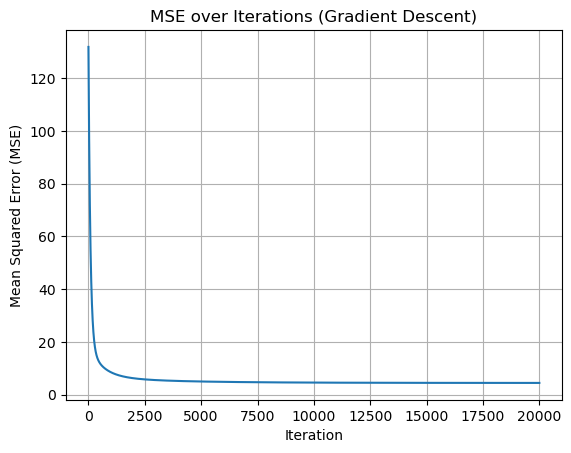

MSE for Gradient Descent: 4.410164521937311


In [225]:
# MSE For OLS
# MSE is just the mean of (Y-h(x))^2. This gives us an idea of how far are our predicted points from actual data
h_ols = biased_X.dot(W_optimal) # h(x) = w^T X = X.W (dot product property)
MSE = np.mean((Y - h_ols) **2, axis = ())
print("Mean Squared Error (MSE) for OLS:", MSE)

# MSE for gradient descent
np.random.seed(22089) # Initialize paramters randomly
grad_para = np.random.randn(biased_X.shape[1], Y.shape[1])

# Define learning rate (alpha) and iterations (t)
alpha = 0.001
t = 20000

# Make an emoty list to store MSE values over each iteration, initialise as an empty list
mse_values = []

# Gradient descent
for i in range(t):
    # Predicted values
    h_grad = np.dot(biased_X, grad_para)
    
    # Gradient for the current parameter
    gradient = -2 * np.matmul(biased_X.T, (Y - h_grad)) / len(Y)
    
    # MSE Computation
    mse = np.mean((Y - h_grad) ** 2)
    mse_values.append(mse)
    
    # Update parameters
    grad_para -= alpha * gradient

# Plot MSE over iterations
plt.plot(range(1, t + 1), mse_values)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE over Iterations (Gradient Descent)')
plt.grid()
plt.show()

print(f"MSE for Gradient Descent: {mse_values[t-1]}")

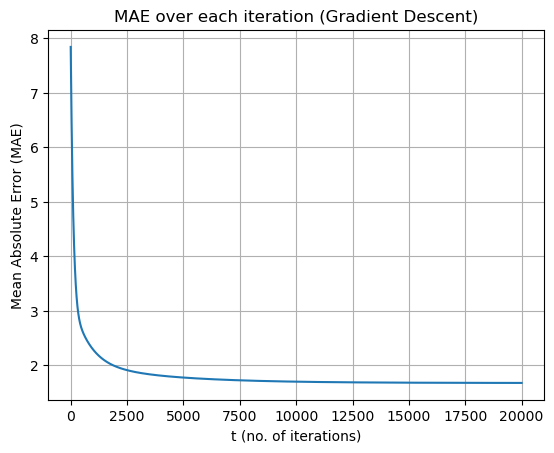

MAE for Gradient Descent: 1.6764916479924254
Mean Absolute Error (MAE) for OLS: 1.6751787575640025


In [226]:
# MAE for gradient descent
np.random.seed(22089) # Initialize parameters randomly and
grad_para = np.random.randn(biased_X.shape[1], Y.shape[1])

# Define learning rate (alpha) and iterations (t)
alpha = 0.001
t = 20000

# We would store MSE values over each iteration in a list so, initialise as an empty list
mae_values = []

# Gradient descent algo:
for i in range(t):
    # Predicted values i.e. h_grad
    h_grad = np.dot(biased_X, grad_para)
    
    # Gradient for the current w
    gradient = -2 * np.dot(biased_X.T, (Y - h_grad)) / len(Y)
    
    # Calculate MSE
    mae = np.mean(np.abs((Y - h_grad)))
    mae_values.append(mae)
    
    # Update w
    grad_para -= alpha * gradient

# Plot MSE over iterations
plt.plot(range(1, t + 1), mae_values)
plt.xlabel('t (no. of iterations)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE over each iteration (Gradient Descent)')
plt.grid()
plt.show()

print(f"MAE for Gradient Descent: {mae_values[t-1]}")

# MAE is just the average of absolute difference between true and predicted value. This gives us an idea of how far are our predicted points from actual data
h_ols = biased_X.dot(W_optimal) # h(x) = w^T X = X.W (dot product property)
MAE = np.mean(np.abs((Y - h_ols)))
print("Mean Absolute Error (MAE) for OLS:", MAE)

# Question 2

In [227]:
def loss(hx,y):
    return (hx-y)**2 #Mean Squared Error

# Requires both to be arrays of the same size
def risk(HX,Y):
    sum = 0
    for i in range(len(Y)):
        sum+=loss(HX[i],Y[i])
    sum=sum/(2*len(Y))
    return sum

# calculates the predicted y for a specific x and parameters
def h(x_new,w)->float:
    #x_new = np.array(1, x1, x1**2, x1**3, x1**4, x2, x2**2, x2**3, x2**4)
    return np.dot(x_new,w)


def make_prediction(x1,x2,w,kernel):
    for i in range(len(pred)):
        pred[i] = h(kernel(x1[i],x2[i]),w)
    return pred


def mse(y1,y2):
    sum = 0
    n = len(y1)
    for i in range(n):
        sum += (y1[i]-y2[i])**2
    return sum/n

def mae(y1,y2):
    sum = 0
    n = len(y1)
    for i in range(n):
        sum += abs(y1[i]-y2[i])
    return sum/n


def pcc(y1,y2):
    sd1 = np.std(y1)
    sd2 = np.std(y2)
    cov = np.cov(y1,y2)[0][1]
    return cov/(sd1*sd2)

In [228]:
alpha_Q2 = 0.01

### Gradient Descent and Ordinary Least Squares

In [229]:
def gradient_descent_Q2(kernel, iterations, y, alpha):
    n = len(kernel(0,0)) # number of new features
    #print(f"n:{n}")
    w = np.array([1]*n, dtype = float)
    risk_temp = risk(make_prediction(x1,x2,w,kernel),y)
    w_arr = []
    risk_arr = []
    w_arr.append(w)
    risk_arr.append(risk_temp)
    m = len(y) # number of datapoints
    w_new = np.array([0]*n, dtype = float)
    for k in range(iterations):
        sum = [0]*n
        for i in range(m):
            for j in range(n):
                x_new = kernel(x1[i], x2[i])
                sum[j] += (x_new[j])*(h(x_new,w)-y[i])
        for i in range(n):
            w_new[i] = w[i] - alpha*sum[i]/m
        
        np.copyto(w,w_new)
        risk_temp = risk(make_prediction(x1,x2,w,kernel),y)
        w_arr.append(w)
        risk_arr.append(risk_temp)
        print(f"step {k}: {risk_temp}")
    return (w_arr, risk_arr)

def OLS_Q2(kernel, y):
    d = len(kernel(0,0))
    y_copy = np.copy(y)
    n = len(y)
    y_copy.shape = (len(y),1)
    print(y_copy.shape)
    
    X = []
    for i in range(n):
        X.append(kernel(x1[i],x2[i]))
    X = np.array(X)
    print(X.shape)

    w = np.matmul(np.linalg.pinv(X),y_copy)
    return w

### Kernels

In [230]:
def kernel1(x1,x2):
    return np.array([1, x1, x2, x1**2, x2**2, x1**3, x2**3, x1**4, x2**4])
def kernel2(x1,x2):
    return np.array([1,x1, x2, x1**2, x2**2, x1**3, x2**3, x1**4, x2**4, x1**5, x2**5])
def kernel3(x1,x2):
    return np.array([1,x1,x2,x1*x2,x1**2, x2**2, x1*x1*x2,x1*x2*x2,x1**3,x2**3,x1**4,x2**4])
def kernel4(x1,x2):
    return np.array([1,x1,x2,x1*x2,x1**2, x2**2, x1*x1*x2,x1*x2*x2,x1**3,x2**3,x1*x1*x2*x2,x1*x1*x1*x2,x1*x2*x2*x2,x1**4,x2**4])

In [231]:
def regression_plot(y):
    #fig,ax = plt.subplots(1,2, subplot_kw={"projection":"3d"})
    fig = plt.figure(figsize=(12,4))
    
    ax1 = fig.add_subplot(1, 3, 1, projection="3d")
    ax1.scatter(x1,x2,y,s=0.5)
    ax1.title.set_text("Training Data")
    
    ax2 = fig.add_subplot(1, 3, 2, projection="3d")
    ax2.scatter(x1,x2,pred,s=0.5)
    ax2.title.set_text("Predictions")
    
    ax3 = fig.add_subplot(1,3,3)
    ax3.scatter(y,pred, s=0.5)
    ax3.title.set_text("Y1 vs Predicted Y1")
    ax3.set_box_aspect(1)
    
    z = np.polyfit(y,pred,1)
    p = np.poly1d(z)
    ax3.plot(y,p(y),"r--", label = "Prediction Trend Line")
    ax3.plot(y,y, label = "Ideal Trend Line", color = "black")
    #fig.suptitle("example")DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated,
    #ax[0].scatter(x1, x2, y1, s = 0.5)
    #ax[1].scatter(x1, x2, pred, s = 0.5)
    ax3.legend()
    ax3.set_xlabel("Actual Data")
    ax3.set_ylabel("Prediction")
    plt.show()

def print_metrics(y1,pred):
    print(f"MSE: {mse(y1,pred)}")
    print(f"MAE: {mae(y1,pred)}")
    print(f"PCC: {pcc(y1,pred)}")

## Predictions

### Y1 OLS

(14000, 1)
(14000, 15)
MSE: 4.424397436695505
MAE: 1.6797884500133595
PCC: 0.965301247914987


/tmp/ipykernel_11061/2391059406.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred[i] = h(kernel(x1[i],x2[i]),w)


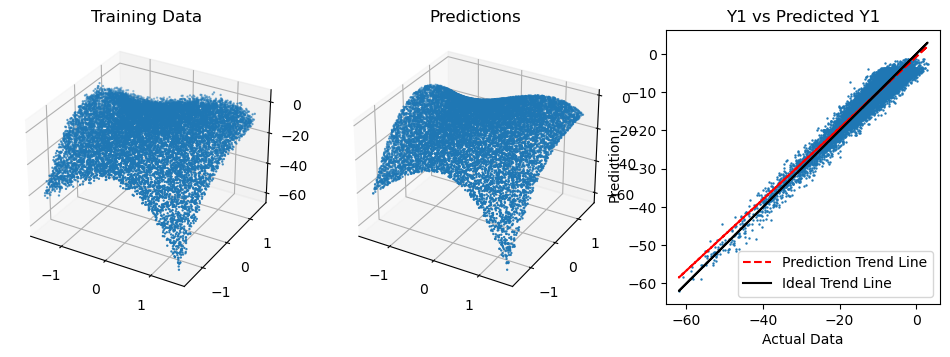

In [232]:
w_OLS = OLS_Q2(kernel4, y1)
make_prediction(x1,x2,w_OLS, kernel4)
print_metrics(y1,pred)
regression_plot(y1)

### Y1 Gradient Descent

In [233]:
(w_arr100, risk_arr100) = gradient_descent_Q2(kernel1,100, y1, 0.01)

step 0: 147.29297473815598
step 1: 132.41282606761058
step 2: 119.22390055236497
step 3: 107.53195217745856
step 4: 97.16512701868369
step 5: 87.97137834593181
step 6: 79.81618028258882
step 7: 72.58050553048967
step 8: 66.15903665477335
step 9: 60.458583947386416
step 10: 55.3966860051955
step 11: 50.90037191574399
step 12: 46.90506638219437
step 13: 43.35362127578699
step 14: 40.19545901174359
step 15: 37.38581483174019
step 16: 34.88506656834162
step 17: 32.65814178665864
step 18: 30.673993365840225
step 19: 28.90513561552638
step 20: 27.327233935593444
step 21: 25.918741835210742
step 22: 24.660579841639464
step 23: 23.53585146103054
step 24: 22.52959191234204
step 25: 21.628545849787642
step 26: 20.82097072639152
step 27: 20.096462837919557
step 28: 19.44580342844056
step 29: 18.860822541270846
step 30: 18.334278566597153
step 31: 17.85975167370662
step 32: 17.431549525053743
step 33: 17.04462385450792
step 34: 16.69449665586536
step 35: 16.377194872520004
step 36: 16.089192607281

MSE: 24.41453250660104
MAE: 3.818672643584283
PCC: 0.8024155859271503


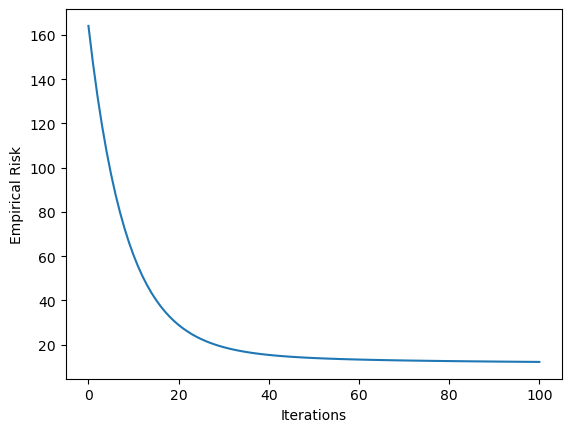

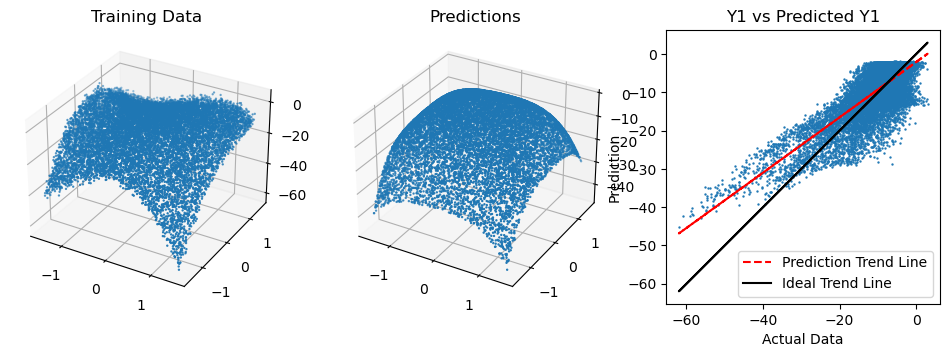

In [234]:
print_metrics(y1,pred)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.arange(len(risk_arr100)),risk_arr100)
ax.set_ylabel("Empirical Risk")
ax.set_xlabel("Iterations")
regression_plot(y1)

In [235]:
(w_arr100, risk_arr100) = gradient_descent_Q2(kernel2,100, y1, 0.01)

step 0: 155.40737305679247
step 1: 138.6546003749973
step 2: 123.883555740225
step 3: 110.85835152700082
step 4: 99.37133314070749
step 5: 89.23967930464565
step 6: 80.30241449701762
step 7: 72.41778320013901
step 8: 65.46094182190463
step 9: 59.32192957763659
step 10: 53.90388437524845
step 11: 49.1214739125037
step 12: 44.89951584561519
step 13: 41.17176408784533
step 14: 37.87984110138951
step 15: 34.97229850474567
step 16: 32.40379047402199
step 17: 30.134346307769665
step 18: 28.12873018382465
step 19: 26.355877592065255
step 20: 24.78839920411213
step 21: 23.40214406184285
step 22: 22.175814950417198
step 23: 21.090629685252736
step 24: 20.130022800764085
step 25: 19.27938279469624
step 26: 18.52582066683858
step 27: 17.857966004767977
step 28: 17.265787320734255
step 29: 16.74043374050327
step 30: 16.27409549361059
step 31: 15.859880960911367
step 32: 15.491708304689947
step 33: 15.16420994343048
step 34: 14.87264834160323
step 35: 14.612841767962125
step 36: 14.38109883693558
s

MSE: 23.59678025638206
MAE: 3.752858075850039
PCC: 0.811676552491912


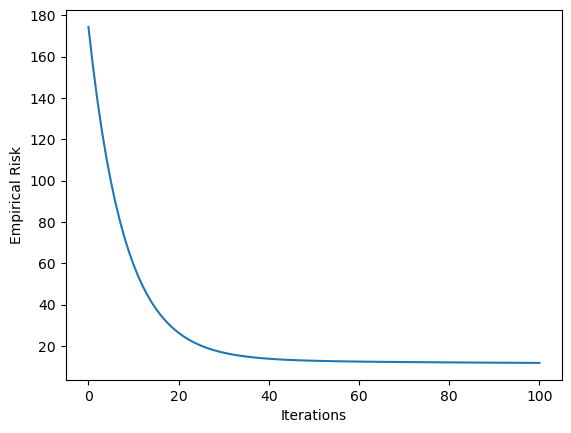

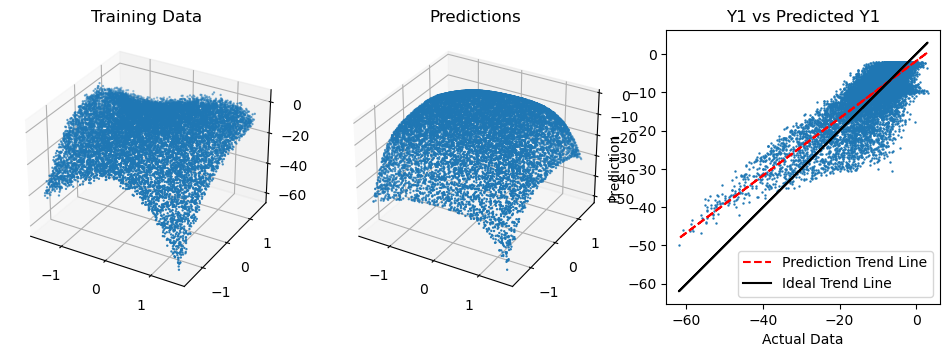

In [236]:
print_metrics(y1,pred)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.arange(len(risk_arr100)),risk_arr100)
ax.set_ylabel("Empirical Risk")
ax.set_xlabel("Iterations")
regression_plot(y1)

In [237]:
(w_arr,risk_arr) = gradient_descent_Q2(kernel3,300,y1, 0.01)

step 0: 145.52232184729405
step 1: 130.4670139136262
step 2: 117.11452289710586
step 3: 105.26980185970764
step 4: 94.7602514161579
step 5: 85.43313080362967
step 6: 77.15326783119643
step 7: 69.80103318914605
step 8: 63.2705485860963
step 9: 57.46810170889711
step 10: 52.31074411989548
step 11: 47.725050965321145
step 12: 43.64602380895055
step 13: 40.01612006366178
step 14: 36.78439440260835
step 15: 33.90573922026729
step 16: 31.340212707101507
step 17: 29.05244442250797
step 18: 27.011109419051813
step 19: 25.18846300436989
step 20: 23.559929141095953
step 21: 22.10373629357624
step 22: 20.80059524515725
step 23: 19.63341404225102
step 24: 18.58704578074401
step 25: 17.648065445072035
step 26: 16.804572447883295
step 27: 16.04601590526449
step 28: 15.363040024854133
step 29: 14.747347286968564
step 30: 14.191577366697702
step 31: 13.689199981818827
step 32: 13.234420060917994
step 33: 12.8220938114336
step 34: 12.447654431275385
step 35: 12.107046352667096
step 36: 11.7966670351144

MSE: 9.142206223763605
MAE: 2.400642719920532
PCC: 0.9276448068034404


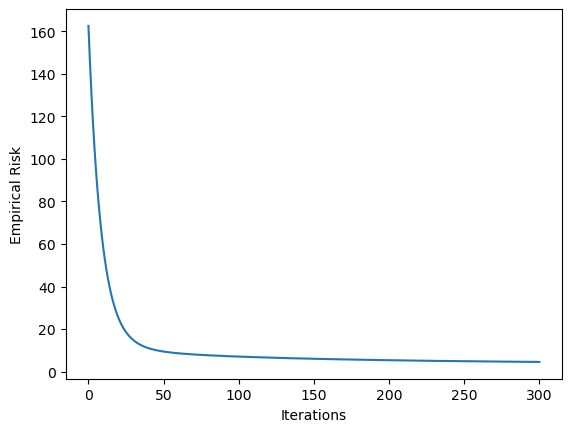

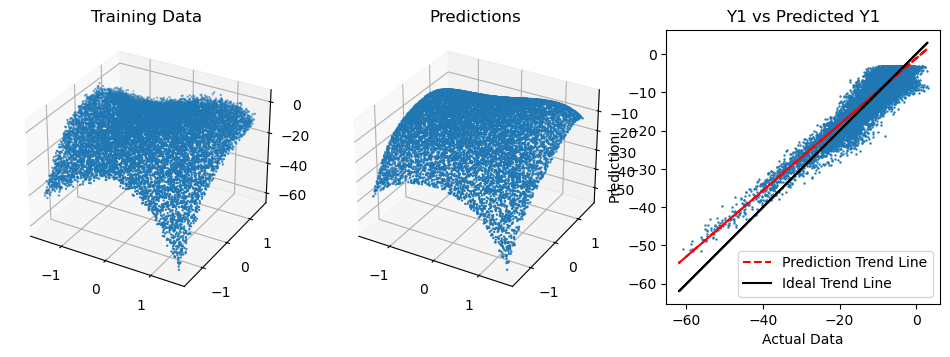

In [238]:
print_metrics(y1,pred)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.arange(len(risk_arr)),risk_arr)
ax.set_ylabel("Empirical Risk")
ax.set_xlabel("Iterations")
regression_plot(y1)

In [239]:
(w_arr,risk_arr) = gradient_descent_Q2(kernel4,400,y1, 0.01)

step 0: 156.27011402822768
step 1: 137.87377149195783
step 2: 121.82600269702105
step 3: 107.82338167164114
step 4: 95.60184801386225
step 5: 84.93159111673057
step 6: 75.6125996768686
step 7: 67.47078994467459
step 8: 60.354637433298805
step 9: 54.13224659758457
step 10: 48.6888015140114
step 11: 43.92434800402861
step 12: 39.75186409028583
step 13: 36.09558128362249
step 14: 32.88952407734913
step 15: 30.076239269315277
step 16: 27.605690424083974
step 17: 25.43429599904007
step 18: 23.524092451962275
step 19: 21.84200607783072
step 20: 20.359219436714348
step 21: 19.05062007363034
step 22: 17.89432083105047
step 23: 16.871242446403485
step 24: 15.964750337539257
step 25: 15.16033853225228
step 26: 14.445354614089085
step 27: 13.808760353615646
step 28: 13.240923387597487
step 29: 12.733435911638574
step 30: 12.278956876465186
step 31: 11.871074634440342
step 32: 11.504187379916157
step 33: 11.173399072422852
step 34: 10.874428832150468
step 35: 10.603532058558134
step 36: 10.3574317

MSE: 6.841490024404766
MAE: 2.0864222577747125
PCC: 0.9463053599739555


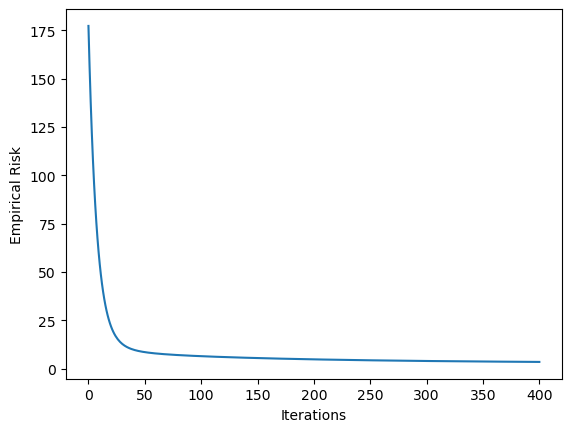

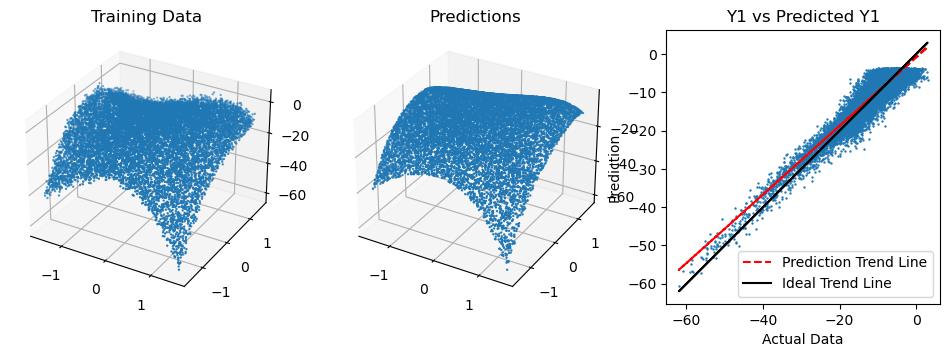

In [240]:
print_metrics(y1,pred)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.arange(len(risk_arr)),risk_arr)
ax.set_ylabel("Empirical Risk")
ax.set_xlabel("Iterations")
regression_plot(y1)

### Y2 OLS

(14000, 1)
(14000, 15)
MSE: 4.370676415807408
MAE: 1.6636749781158706
PCC: 0.9467955785704084


/tmp/ipykernel_11061/2391059406.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred[i] = h(kernel(x1[i],x2[i]),w)


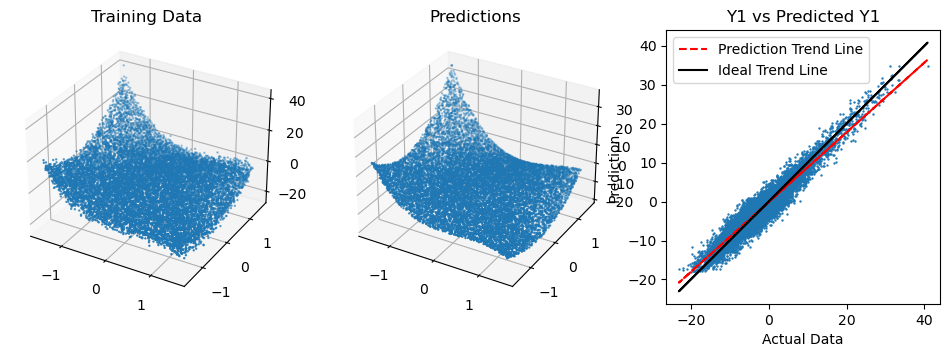

In [241]:
w_OLS = OLS_Q2(kernel4, y2)
make_prediction(x1,x2,w_OLS, kernel4)
print_metrics(y2,pred)
regression_plot(y2)

### Y2 Gradient Descent


In [242]:
(w_arr,risk_arr) = gradient_descent_Q2(kernel4,400,y2, 0.01)

step 0: 66.33648554092754
step 1: 61.30721453941458
step 2: 56.77204596681783
step 3: 52.675278013661476
step 4: 48.967990312324936
step 5: 45.60718694530121
step 6: 42.55504957718216
step 7: 39.778286457320725
step 8: 37.2475648905084
step 9: 34.93701638281807
step 10: 32.82380507036441
step 11: 30.887751257292784
step 12: 29.111002949509015
step 13: 27.477749193106614
step 14: 25.97396982903374
step 15: 24.58721697386739
step 16: 23.306424144185648
step 17: 22.121739470725398
step 18: 21.02437990856192
step 19: 20.006503749872927
step 20: 19.0610990941944
step 21: 18.181886234227907
step 22: 17.363232179062162
step 23: 16.600075766265117
step 24: 15.887862014108538
step 25: 15.222484539098593
step 26: 14.600235015346662
step 27: 14.017758784065778
step 28: 13.472015836171641
step 29: 12.960246490793738
step 30: 12.479941179429884
step 31: 12.028813821140767
step 32: 11.604778340075063
step 33: 11.205927933987972
step 34: 10.830516752378953
step 35: 10.476943686389136
step 36: 10.1437

MSE: 5.614367268608184
MAE: 1.8789802076967286
PCC: 0.9315436054402402


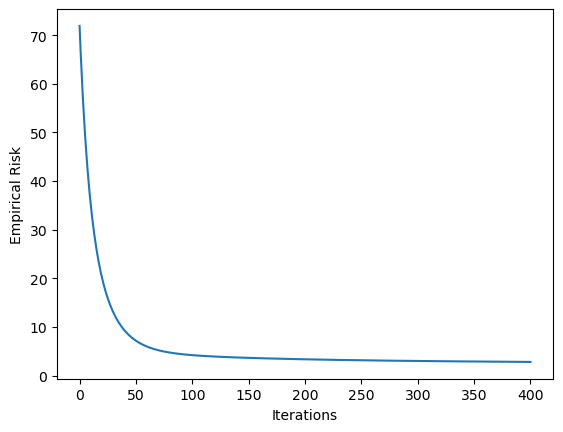

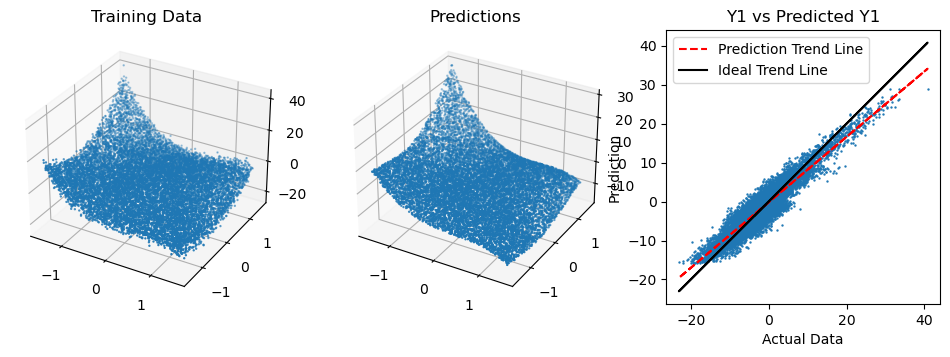

In [243]:
print_metrics(y2,pred)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.arange(len(risk_arr)),risk_arr)
ax.set_ylabel("Empirical Risk")
ax.set_xlabel("Iterations")
regression_plot(y2)

### Y3 OLS

(14000, 1)
(14000, 15)
MSE: 4.406945618679342
MAE: 1.6814160185076346
PCC: 0.9748846819885931


/tmp/ipykernel_11061/2391059406.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred[i] = h(kernel(x1[i],x2[i]),w)


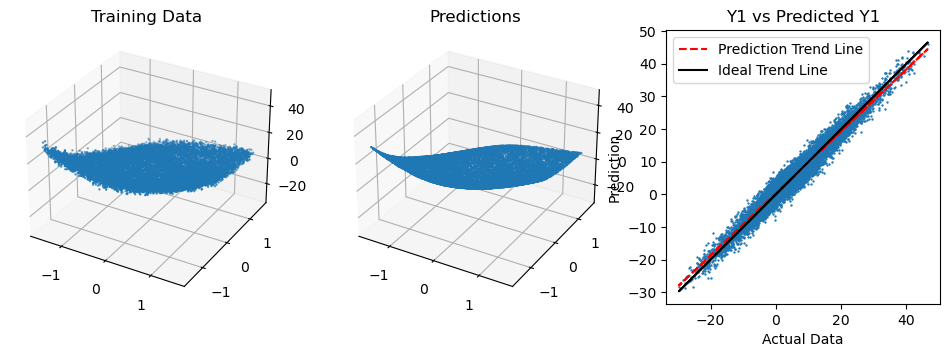

In [244]:
w_OLS = OLS_Q2(kernel4, y3)
make_prediction(x1,x2,w_OLS, kernel4)
print_metrics(y3,pred)
regression_plot(y3)

### Y3 Gradient Descent

In [246]:
(w_arr,risk_arr) = gradient_descent_Q2(kernel4,400,y3, 0.01)

step 0: 58.42701225480295
step 1: 55.547568135016874
step 2: 52.82186684521628
step 3: 50.24158697948016
step 4: 47.798866576334945
step 5: 45.486276639905235
step 6: 43.296796326505195
step 7: 41.22378967512224
step 8: 39.26098377096108
step 9: 37.40244824082395
step 10: 35.64257598771857
step 11: 33.97606507981624
step 12: 32.39790171585744
step 13: 30.90334419535583
step 14: 29.487907827631112
step 15: 28.14735071881514
step 16: 26.877660380622796
step 17: 25.675041108879253
step 18: 24.53590208364459
step 19: 23.456846146244256
step 20: 22.434659211712955
step 21: 21.466300278062263
step 22: 20.548891996445477
step 23: 19.679711768742308
step 24: 18.85618334132511
step 25: 18.075868865836462
step 26: 17.336461399713148
step 27: 16.635777820945215
step 28: 15.971752133187342
step 29: 15.342429138837774
step 30: 14.745958459100555
step 31: 14.180588881332993
step 32: 13.644663015189412
step 33: 13.136612240183426
step 34: 12.654951928340832
step 35: 12.198276926577046
step 36: 11.765

MSE: 4.8414010158276435
MAE: 1.7601029468029117
PCC: 0.9724803368518912


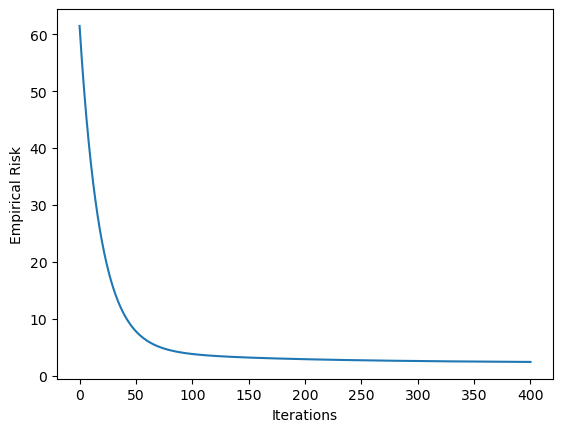

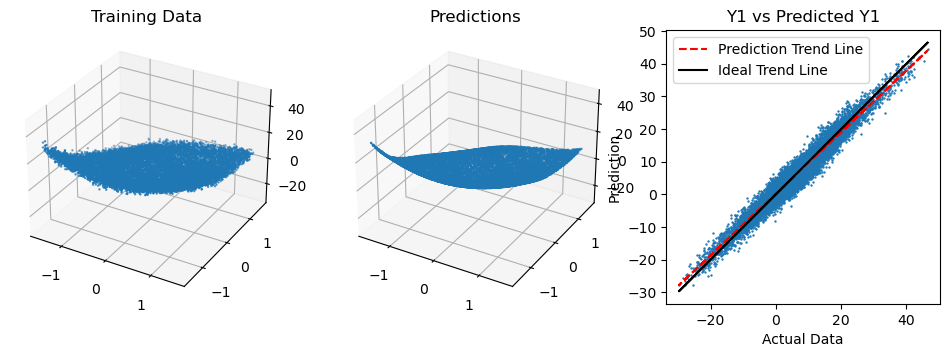

In [60]:
print_metrics(y3,pred)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.arange(len(risk_arr)),risk_arr)
ax.set_ylabel("Empirical Risk")
ax.set_xlabel("Iterations")
regression_plot(y3)

# Question 3

In [73]:
file_name = 'regression_data_uni_group_19_train.txt'
x1 = []
x2 = []
x3 = []
x4 = []
x5 = []
y = []
with open(file_name,"r") as csvfile:
    reader_variable = csv.reader(csvfile,delimiter="\t")
    for row in reader_variable:
        x1.append(row[0])
        x2.append(row[1])
        x3.append(row[2])
        x4.append(row[3])
        x5.append(row[4])
        y.append(row[5])
x1 = np.array([float(x) for x in x1[1:]])
x2 = np.array([float(x) for x in x2[1:]])
x3 = np.array([float(x) for x in x3[1:]])
x4 = np.array([float(x) for x in x4[1:]])
x5 = np.array([float(x) for x in x5[1:]])
y = np.array([float(x) for x in y[1:]])

pred_y =np.array([0]*len(y),dtype = float)

### Non polynomial kernels

In [76]:
def kernel1(x1,x2,x3,x4,x5):
    return np.array([x1,x2,x3,x4,x5,math.sin(x1),math.sin(x2),math.sin(x3),math.sin(x4),math.sin(x5),math.sin(3*x1),math.sin(3*x2),math.sin(3*x3),math.sin(3*x4),math.sin(3*x5),1])


def kernel2(x1,x2,x3,x4,x5):
    return np.array([x1,x2,x3,x4,x5,
                     math.sin(x1),math.sin(x2),math.sin(x3),math.sin(x4),math.sin(x5),
                     math.sin(2*x1),math.sin(2*x2),math.sin(2*x3),math.sin(2*x4),math.sin(2*x5),
                     math.sin(3*x1),math.sin(3*x2),math.sin(3*x3),math.sin(3*x4),math.sin(3*x5),
                     math.sin(5*x1),math.sin(5*x2),math.sin(5*x3),math.sin(5*x4),math.sin(5*x5),
                     1])


In [77]:
def mse(y1,y2):
    sum = 0
    n = len(y1)
    for i in range(n):
        sum += (y1[i]-y2[i])**2
    return sum/n

def mae(y1,y2):
    sum = 0
    n = len(y1)
    for i in range(n):
        sum += abs(y1[i]-y2[i])
    return sum/n

def print_metrics(y,pred_y):
    print(f"MSE: {mse(y,pred_y)}")
    print(f"MAE: {mae(y,pred_y)}")
    print(f"PCC: {pcc(y,pred_y)}")


def pcc(y1,y2):
    sd1 = np.std(y1)
    sd2 = np.std(y2)
    cov = np.cov(y1,y2)[0][1]
    return cov/(sd1*sd2)

def regression_plot():
    #fig,ax = plt.subplots(1,2, subplot_kw={"projection":"3d"})
    fig2 = plt.figure(figsize=(12,4))
    
    ax1 = fig2.add_subplot(1, 3, 1, projection="3d")
    ax1.scatter(x1,x2,y,s=0.5)
    ax1.title.set_text("Training Data")
    
    ax2 = fig2.add_subplot(1, 3, 2, projection="3d")
    ax2.scatter(x1,x2,pred_y,s=0.5)
    ax2.title.set_text("Predictions")
    
    ax3 = fig2.add_subplot(1,3,3)
    ax3.scatter(y,pred_y, s=0.5)
    ax3.title.set_text("Predicted Y vs Y")
    ax3.set_box_aspect(1)
    
    z = np.polyfit(y,pred_y,1)
    p = np.poly1d(z)
    ax3.plot(y,p(y),"r--", label = "Prediction Trend Line")
    ax3.plot(y,y, label = "Ideal Trend Line")
    #fig.suptitle("example")
    #ax[0].scatter(x1, x2, y1, s = 0.5)
    #ax[1].scatter(x1, x2, pred, s = 0.5)
    
    plt.show()

In [78]:
def make_prediction_log(x1,x2,x3,x4,x5,w,kernel):
    for i in range(len(x1)):
        x = kernel(x1[i],x2[i],x3[i],x4[i],x5[i])
        pred_y[i] = 1/(1+math.exp(-np.dot(w,x)))
    return pred_y

def risk_sq_err(pred_y,y):
    risk = 0
    for i in range(len(y)):
        risk += (pred_y[i]-y[i])**2
    risk/=len(y)
    return risk

def make_prediction_lin(x1,x2,x3,x4,x5,w,kernel):
    for i in range(len(x1)):
        x = kernel(x1[i],x2[i],x3[i],x4[i],x5[i])
        pred_y[i] = np.dot(x,w)
    return pred_y

def risk_cross_entropy(pred_y,y):
    risk = 0
    for i in range(len(y)):
        risk += -y[i]*math.log(pred_y[i])-(1-y[i])*(1-math.log(pred_y[i]))
    risk/=len(y)
    return risk
        

(7000, 1)
(7000, 26)
MSE: 0.017251169903421768
MAE: 0.081129385140707
PCC: 0.9436804015411892


/tmp/ipykernel_11061/2753814273.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_y[i] = np.dot(x,w)


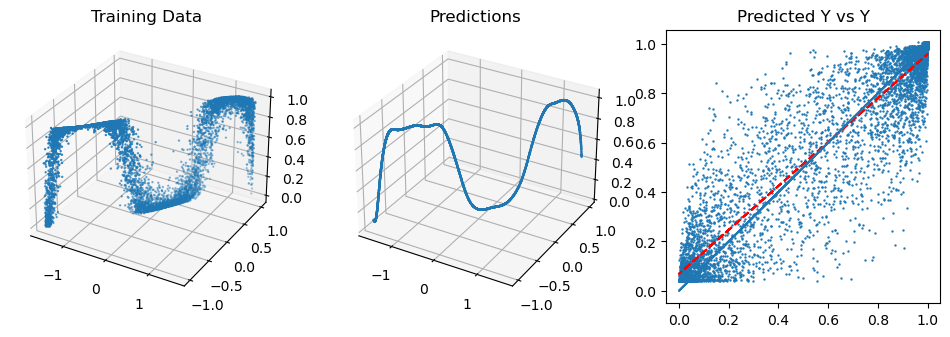

In [79]:
def OLS_Q3(kernel, y):
    d = len(kernel(0,0,0,0,0))
    y_copy = np.copy(y)
    n = len(y)
    y_copy.shape = (len(y),1)
    print(y_copy.shape)
    
    X = []
    for i in range(n):
        X.append(kernel(x1[i],x2[i],x3[i],x4[i],x5[i]))
    X = np.array(X)
    print(X.shape)

    w = np.dot(np.linalg.pinv(X),y_copy) #no constraints involved
    return w

w_OLS = OLS_Q3(kernel2, y)
make_prediction_lin(x1,x2,x3,x4,x5,w_OLS, kernel2)
print_metrics(y,pred_y)
regression_plot()

In [80]:
x3.shape

(7000,)

In [81]:
def gradient_descent_Q3(kernel, iterations,alpha,w_start,loss_fn,regressor):
    n = len(kernel(0,0,0,0,0)) # number of new features
    print(f"n:{n}")
    w = np.array([1]*n, dtype = float)
    np.copyto(w,w_start)
    #risk_temp = risk(make_prediction(x1,x2,x3,x4,x5,w,kernel),y)
    w_arr = []
    risk_arr = []
    w_arr.append(w)
    m = len(y) # number of datapoints
    w_new = np.array([0]*n, dtype = float)
    if loss_fn == "sq_err" and regressor == "logistic":
        risk_temp = risk_sq_err(make_prediction_log(x1,x2,x3,x4,x5,w,kernel),y)
        risk_arr.append(risk_temp)
        for k in range(iterations):
            sum = [0]*n
            p = make_prediction_log(x1,x2,x3,x4,x5,w,kernel)
            for i in range(len(y)):
                for j in range(n):
                    x_new = kernel(x1[i], x2[i],x3[i],x4[i],x5[i])
                    sum[j] += 2*(x_new[j])*(p[i]-y[i])*(1-p[i])*p[i]

            for i in range(n):
                w_new[i] = w[i] - alpha*sum[i]/m

            np.copyto(w,w_new)
            risk_temp = risk_sq_err(make_prediction_log(x1,x2,x3,x4,x5,w,kernel),y)
            w_arr.append(w)
            risk_arr.append(risk_temp)
            if k % 100 == 0:
                print(f"Step {k} Risk: {risk_temp}")
    elif loss_fn == "sq_err" and regressor == "linear":
        risk_temp = risk_sq_err(make_prediction_lin(x1,x2,x3,x4,x5,w,kernel),y)
        risk_arr.append(risk_temp)
        for k in range(iterations):
            sum = [0]*n
            p = make_prediction_lin(x1,x2,x3,x4,x5,w,kernel)
            for i in range(len(y)):
                for j in range(n):
                    x_new = kernel(x1[i], x2[i],x3[i],x4[i],x5[i])
                    sum[j] += 2*(x_new[j])*(p[i]-y[i])

            for i in range(n):
                w_new[i] = w[i] - alpha*sum[i]/m

            np.copyto(w,w_new)
            risk_temp = risk_sq_err(make_prediction_lin(x1,x2,x3,x4,x5,w,kernel),y)
            w_arr.append(w)
            risk_arr.append(risk_temp)
            if k % 100 == 0:
                print(f"Step {k} Risk: {risk_temp}")
    elif loss_fn == "cross_entropy" and regressor == "logistic":
        risk_temp = risk_cross_entropy(make_prediction_log(x1,x2,x3,x4,x5,w,kernel),y)
        risk_arr.append(risk_temp)
        for k in range(iterations):
            sum = [0]*n
            p = make_prediction_log(x1,x2,x3,x4,x5,w,kernel)
            for i in range(len(y)):
                for j in range(n):
                    x_new = kernel(x1[i], x2[i],x3[i],x4[i],x5[i])
                    sum[j] += (x_new[j])*((1-y[i])*(1-p[i]) - y[i]*p[i])

            for i in range(n):
                w_new[i] = w[i] - alpha*sum[i]/m

            np.copyto(w,w_new)
            risk_temp = risk_cross_entropy(make_prediction_log(x1,x2,x3,x4,x5,w,kernel),y)
            w_arr.append(w)
            risk_arr.append(risk_temp)
            if k % 100 == 0:
                print(f"Step {k} Risk: {risk_temp}")
    elif loss_fn == "cross_entropy" and regressor == "linear":
        risk_temp = risk_cross_entropy(make_prediction_log(x1,x2,x3,x4,x5,w,kernel),y)
        risk_arr.append(risk_temp)
        for k in range(iterations):
            sum = [0]*n
            p = make_prediction_lin(x1,x2,x3,x4,x5,w,kernel)
            for i in range(len(y)):
                for j in range(n):
                    x_new = kernel(x1[i], x2[i],x3[i],x4[i],x5[i])
                    sum[j] += (x_new[j])*((1-y[i])/(1-p[i]) - y[i]/p[i])

            for i in range(n):
                w_new[i] = w[i] - alpha*sum[i]/m

            np.copyto(w,w_new)
            risk_temp = risk_cross_entropy(make_prediction_log(x1,x2,x3,x4,x5,w,kernel),y)
            if k % 100 == 0:
                print(f"Step {k} Risk: {risk_temp}")
    
            w_arr.append(w)
            risk_arr.append(risk_temp)

            
        
        
    print_metrics(y,pred_y)
    regression_plot()
    return (w_arr,risk_arr)

n:16
Step 0 Risk: 0.19494272757561382
MSE: 0.020870781479672227
MAE: 0.10588190231745148
PCC: 0.9314181655304631


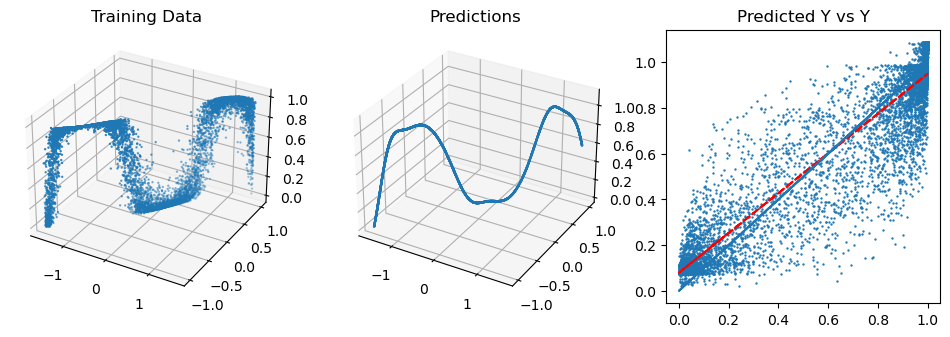

In [27]:
w_start = np.array([0.001]*len(kernel1(0,0,0,0,0)), dtype = float)
gradient_descent_Q3(kernel1, 100, 0.1,w_start,'sq_err','linear')

n:26
Step 0 Risk: 0.09995440026176514
MSE: 0.019586757109521003
MAE: 0.09608689821107355
PCC: 0.9357955757553842


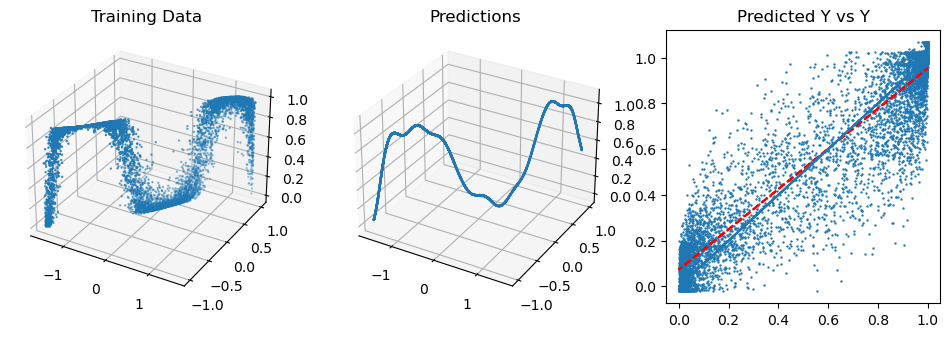

In [28]:
w_start = np.array([0.001]*len(kernel2(0,0,0,0,0)), dtype = float)
gradient_descent_Q3(kernel2, 100, 0.1,w_start,'sq_err','linear')

n:26
Step 0 Risk: 0.09995440026176514
Step 100 Risk: 0.019579060437344177
Step 200 Risk: 0.01908834506440161
MSE: 0.018891899711129916
MAE: 0.0912970394777911
PCC: 0.9381350513850722


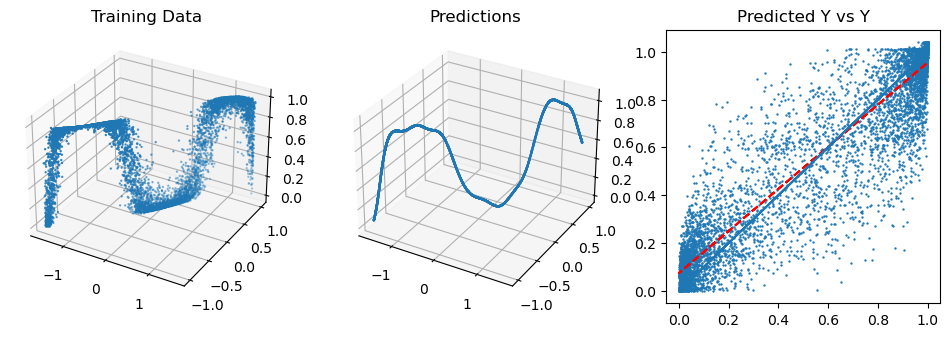

In [29]:
w_start = np.array([0.001]*len(kernel2(0,0,0,0,0)), dtype = float)
gradient_descent_Q3(kernel2, 300, 0.1,w_start,'sq_err','linear')

# Question 4

In [120]:
file_name ="binary_classification_data_group_19_train.txt"
input = pd.read_csv(file_name, delimiter = "\t")
input.columns = [s.replace("feature","x") for s in input.columns]
input.columns = [s.replace("label","y") for s in input.columns]
input

x0        x1        x2        x3        x4        x5        x6  \
0     -0.106997  1.485838  0.192529 -0.542238  0.806671  0.516651 -0.356262   
1     -0.483570 -0.037748  1.076714  0.881062  0.553434  0.694892  2.007857   
2      0.920575 -0.829576  0.067335 -0.334511  0.533332  0.447179  1.016864   
3      1.172999  1.604495 -0.009402  1.722216 -0.137952  0.811933 -0.643291   
4     -0.710427 -0.031585 -0.080853  1.323485  0.244173  0.478071 -0.358927   
...         ...       ...       ...       ...       ...       ...       ...   
13995 -0.059254  0.173614  0.214894  0.730481  0.207205  0.629217  0.234333   
13996  0.872124  2.083861  0.522220  0.934926  0.287227  0.171398 -0.095827   
13997  0.458797  2.370120  0.738793  1.838470 -1.077731  0.770602  1.039311   
13998  0.595255 -1.177242  1.212184  0.833929  1.162030  0.029585 -0.008450   
13999  0.462560 -0.587893 -0.791685  1.162852  0.351421 -1.446202  1.098855   

             x7        x8        x9  y  
0      1.026215  1.070348  0.478741  1  
1      0.840973  1.554677  0.555548  0  
2      0.195170  1.342137  3.051097  0  
3      1.362184  0.278682  1.359449  1  
4     -0.805563 -0.890038  0.990869  0  
...         ...       ...       ... ..  
13995  1.062285  1.863648  0.803113  0  
13996  0.476535  0.485519  0.763501  0  
13997 -0.186269  0.347097  0.153163  0  
13998  1.169510 -0.139573  1.817521  1  
13999  0.886257  1.207568 -0.319255  1  

[14000 rows x 11 columns]

In [121]:
x = np.array(input.iloc[:,0:10])
print(x.shape)
y = np.array(input.iloc[:,10])
print(y.shape)

test_x = x[:7000,]
test_y = y[:7000,]

train_x = x[7000:,]
train_y = y[7000:,]

(14000, 10)
(14000,)


In [147]:
datapoints = len(train_y)
K = 2


# EM for GMM

Gaussian Distribution

$$N(x| \mu,\sigma^2) = \frac{1}{(2\pi\sigma^2)^{1/2}}exp(-\frac{1}{2\sigma^2}(x-\mu)^2)$$

Multivariate Gaussian Distribution in D dimensions

$$N(x| \mu,\Sigma) = \frac{1}{(2\pi)^{D/2}|\Sigma|^{1/2}}exp(-\frac{1}{2}(x-\mu)\Sigma^{-1}(x-\mu))$$

Mixture of K Gaussians 

$$p(x) = \sum_{k=1}^{K}\pi_k N(x| \mu,\Sigma)$$

In [148]:
# x,mu is a d x 1 vector
# sigma is a dxd matrix
def N(x,mu,sigma):
    d = len(x)
    x = np.array(x)
    mu = np.array(mu)
    x.shape = (d,1)
    mu.shape = (d,1)
    #md = mahalanobis distance
    md_square = np.transpose(x-mu) @ np.linalg.inv(sigma) @ (x-mu)
    det = np.linalg.det(sigma)
    if det < 0:
        print(sigma)
    #print(det)
    coeff = 1/(math.sqrt((2*math.pi)**d * det) )
    return coeff*math.exp(-0.5 * md_square)

N = number of points

K = number of gaussians

Step 1: Initialise $\mu_k$, $\Sigma_k$, $\alpha_k$

Step 2: E Step: $$Q(z(n,k)) = p(z|x) = \frac{\alpha_k N(x_n|\mu_k,\Sigma_k)}{\sum_{j=1}^K\alpha_j N(x_n|\mu_j,\Sigma_j)}$$

Step 3: M Step: 

(N_k : Effective number of points assigned to cluster k) (ignore)
$$N_k = \sum_{n=1}^{N}Q(z(n,k))$$
$$(\sum_{k=1}^K N_k = N)$$
$$\mu_k^{new} = \frac{1}{N_k}\sum_{n=1}^{N}Q(z(n,k))x_n$$
$$\Sigma_k^{new} = \frac{1}{N_k}\sum_{n=1}^{N}Q(z(n,k))(x-\mu_k^{new})(x-\mu_k^{new})^T$$
$$\alpha_k^{new} = \frac{N_k}{N}$$

Step 4: Evaluate Log Likelihood

$$ln(X | \mu, \Sigma, \alpha) = \sum_{n=1}^{N} ln \sum_{k=1}^{K}\alpha_kN(x_n|\mu_k,\Sigma_k)$$

Repeat 2-4 until convergence

In [151]:
def EM(x,y, iter = 100):
    datapoints = len(y)
    ll = []
    mu_arr = []
    sigma_arr = []
    alpha_arr = []
    alpha_init = 1/K
    mu_init = np.array([0]*10, dtype = float)
    
    sigma_init = np.array([0]*100, dtype = float)
    sigma_init.shape = (10,10)

    sigma_init2 = np.cov(np.array(x),rowvar=False)
    for i in range(K):
        mu_arr.append(np.array([i]*10,dtype = float))
        sigma_arr.append(copy.deepcopy(sigma_init2))
        alpha_arr.append(1/K)

    
    for i in range(iter):
        #if i % 10 == 0:
        print(f"i:{i}")
        
        # E Step
        print("E Step")
        qz = np.array([0]*(datapoints*K), dtype = float)
        qz.shape = (datapoints,K)
        for n in range(datapoints):
            #if n % 1000 == 0:
                #print(f"n:{n}")
            sum = 0
            for j in range(K):
                #print(f"inj:{i},{n},{j}: {N(x[n,],mu_arr[j],sigma_arr[j])}")
                sum += alpha_arr[j] * N(x[n,],mu_arr[j],sigma_arr[j])
            #print(f"sum: {sum}")
            for k in range(K):
                qz[n,k] = alpha_arr[k]*N(x[n,], mu_arr[k], sigma_arr[k]) / sum
        #print(qz)
        
        # M step
        print("M Step")
        n_k = [0]*K
        
        for k in range(K):
            #print(f"k:{k}")
            mu_new = np.zeros(10)
            sigma_new = np.zeros((10,10))
            alpha_new = 0

            
            for n in range(datapoints):
                n_k[k] += qz[n,k]
            #print("here")
            #print(f"n_k {k}: {n_k[k]}")
            for n in range(datapoints):
                mu_new += qz[n,k] * np.array(x[n,])
            mu_new = mu_new/n_k[k]
            #print(f"mu_arr[{k}]: {mu_arr[k]}")
            #print(f"final mu_new:{mu_new}")
            mu_arr[k] = mu_new
            #print(f"mu_arr[{k}]: {mu_arr[k]}")
            #print("here here")
            for n in range(datapoints):
                xn = np.array(x[n,])
                xx = xn - mu_new
                xx.shape = (10,1)
                xxx = xx @ np.transpose(xx)
                sigma_new += qz[n,k]*xxx
            
            sigma_new = sigma_new/n_k[k]
            
            sigma_arr[k] = sigma_new
    
            alpha_arr[k] = n_k[k]/datapoints

        ll_new = 0
        for n in range(datapoints):
            sum_ll = 0
            for k in range(K):
                sum_ll+=alpha_arr[k]*N(x[n,],mu_arr[k], sigma_arr[k])
            ll_new+=math.log(sum_ll)
        ll.append(ll_new)

    return (alpha_arr, mu_arr, sigma_arr, ll)
    

In [152]:
(alpha,mu,sigma,ll) = EM(x,y)

i:0
E Step


/tmp/ipykernel_11061/173857900.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return coeff*math.exp(-0.5 * md_square)


M Step
i:1
E Step
M Step
i:2
E Step
M Step
i:3
E Step
M Step
i:4
E Step
M Step
i:5
E Step
M Step
i:6
E Step
M Step
i:7
E Step
M Step
i:8
E Step
M Step
i:9
E Step
M Step
i:10
E Step
M Step
i:11
E Step
M Step
i:12
E Step
M Step
i:13
E Step
M Step
i:14
E Step
M Step
i:15
E Step
M Step
i:16
E Step
M Step
i:17
E Step
M Step
i:18
E Step
M Step
i:19
E Step
M Step
i:20
E Step
M Step
i:21
E Step
M Step
i:22
E Step
M Step
i:23
E Step
M Step
i:24
E Step
M Step
i:25
E Step
M Step
i:26
E Step
M Step
i:27
E Step
M Step
i:28
E Step
M Step
i:29
E Step
M Step
i:30
E Step
M Step
i:31
E Step
M Step
i:32
E Step
M Step
i:33
E Step
M Step
i:34
E Step
M Step
i:35
E Step
M Step
i:36
E Step
M Step
i:37
E Step
M Step
i:38
E Step
M Step
i:39
E Step
M Step
i:40
E Step
M Step
i:41
E Step
M Step
i:42
E Step
M Step
i:43
E Step
M Step
i:44
E Step
M Step
i:45
E Step
M Step
i:46
E Step
M Step
i:47
E Step
M Step
i:48
E Step
M Step
i:49
E Step
M Step
i:50
E Step
M Step
i:51
E Step
M Step
i:52
E Step
M Step
i:53
E Step
M 

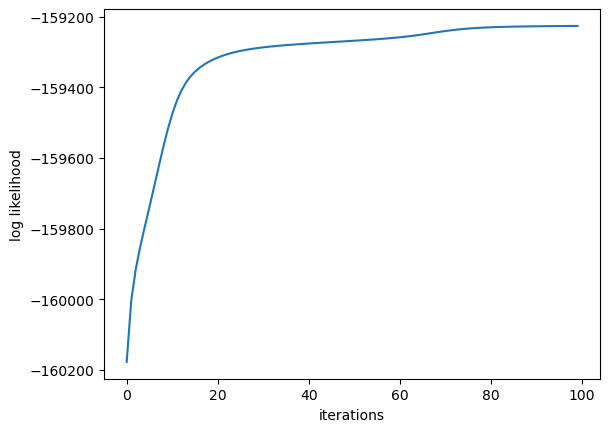

In [153]:
index = []
for i in range(100):
    index.append(i)
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel("iterations")
ax.set_ylabel("log likelihood")
ax.plot(index,ll)

In [154]:
class1 = []
class2 = []

assigned = []
for n in range(datapoints):
    sum = 0
    for j in range(K):
                #print(f"inj:{i},{n},{j}: {N(x[n,],mu_arr[j],sigma_arr[j])}")
        sum += alpha[j] * N(x[n,],mu[j],sigma[j])
            #print(f"sum: {sum}")
    qz = [0,0]
    for k in range(K):
        qz[k] = alpha[k]*N(x[n,], mu[k], sigma[k]) / sum
        #print(f"(n,j,k):{n},{j},{k}: {qz[k]}")
    if qz[0] > qz[1]:
        class1.append(x[n,])
        assigned.append(0)
    else:
        class2.append(x[n,])
        assigned.append(1)

len(class1)

/tmp/ipykernel_11061/173857900.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return coeff*math.exp(-0.5 * md_square)


2924

In [155]:
# class 1 vs y
#print(assigned)
#[y][predict
bin0 = len(class1)
bin1 = len(class2)
bin_arr = [bin0,bin1]
sum = np.zeros((2,2))
for class_ in range(2):
    for bin in range(2):
        for i in range(datapoints):
            if y[i] == class_ and assigned[i] ==bin:
                sum[class_][bin]+=1
            
for bin in range(2):
    for class_ in range(2):
        print(f"% of bin {bin} to class {class_}: {sum[class_][bin]*100/bin_arr[bin]}")

for i in range(2):
    for j in range(2):
        print(f"class:{i} bin:{j} - {sum[i][j]}")

% of bin 0 to class 0: 66.38166894664843
% of bin 0 to class 1: 33.618331053351575
% of bin 1 to class 0: 38.64082433758587
% of bin 1 to class 1: 61.35917566241413
class:0 bin:0 - 1941.0
class:0 bin:1 - 1575.0
class:1 bin:0 - 983.0
class:1 bin:1 - 2501.0


In [161]:
confusion_matrix = sum

print(f"Confusion Matrix:\n {confusion_matrix}")

Confusion Matrix:
 [[1941. 1575.]
 [ 983. 2501.]]


In [159]:
TP = 1941
FN = 1575
FP = 983
F1_0 = TP/(TP + 0.5*(FP + FN))

TP = 2501
FN = 983
FP = 1575
F1_1 = TP/(TP + 0.5*(FP + FN))

print(f"F1 Score for class 0: {F1_0}")
print(f"F1 Score for class 1: {F1_1}")

F1 Score for class 0: 0.6027950310559006
F1 Score for class 1: 0.6616402116402117


In [162]:
# Assume that bin i maps to class i
bin_to_class = [0,1]
sum_final = 0
for i in range(datapoints):
    if y[i] == assigned[i]:
        sum_final +=1
acc = sum_final/datapoints
print(f"EM for GMM: Accuracy: {acc}")

Accuracy: 0.6345714285714286


# KNN Algorithm

### Distance Metrics

In [163]:
def euclidean(source, dest):
    sum = 0
    for i in range(len(source)):
        sum+= (source[i] - dest[i])**2
    return sum

def cosine(source, dest):
    return np.dot(source,dest)/(np.linalg.norm(source) * np.linalg.norm(dest))
    

In [164]:
x = x[:7000,]
datapoints = 7000
print(train_y)

[0 1 1 ... 0 1 1]


In [166]:
nn_pred = [0]*datapoints
dist_arr = [0]*datapoints
def knn(x_train,y_train,x_test,y_test,knn_k, distance):
    print(knn_k)
    for i in range(datapoints): # for every test point, we check each train point
        print(f"i:{i}")
        for j in range(datapoints): # train points
            dist_arr[j] = distance(x_test[i,],x_train[j,])
            if dist_arr[j] == 0:
                dist_arr[j] == float("inf")
        dist_copy = sorted(dist_arr)
        nearest_neighbour_index = []
        for j in range(knn_k):
            nearest_neighbour_index.append(dist_arr.index(dist_copy[j]))
        print(nearest_neighbour_index)
        nn_given = [y_train[n] for n in nearest_neighbour_index]
        
        sum = 0
        for j in range(knn_k):
            sum += nn_given[j]
        if sum > knn_k/2:
            nn_pred[i] = 1
        else:
            nn_pred[i] = 0
    return nn_pred

In [167]:
nn_pred = knn(train_x,train_y, test_x, test_y, 1,euclidean)

1
i:0
[4861]
i:1
[5930]
i:2
[652]
i:3
[411]
i:4
[4056]
i:5
[2346]
i:6
[3301]
i:7
[4108]
i:8
[798]
i:9
[2790]
i:10
[4425]
i:11
[2592]
i:12
[5342]
i:13
[6191]
i:14
[103]
i:15
[6602]
i:16
[5319]
i:17
[5470]
i:18
[6512]
i:19
[3355]
i:20
[6301]
i:21
[3765]
i:22
[577]
i:23
[1049]
i:24
[5219]
i:25
[424]
i:26
[6869]
i:27
[6617]
i:28
[5180]
i:29
[4060]
i:30
[650]
i:31
[3245]
i:32
[4178]
i:33
[4710]
i:34
[1916]
i:35
[5534]
i:36
[5554]
i:37
[3866]
i:38
[105]
i:39
[4558]
i:40
[6289]
i:41
[5082]
i:42
[802]
i:43
[5380]
i:44
[6928]
i:45
[3175]
i:46
[6737]
i:47
[1018]
i:48
[3118]
i:49
[6341]
i:50
[1350]
i:51
[1636]
i:52
[54]
i:53
[2878]
i:54
[4604]
i:55
[1587]
i:56
[116]
i:57
[4254]
i:58
[2647]
i:59
[2441]
i:60
[614]
i:61
[3132]
i:62
[1990]
i:63
[5065]
i:64
[2847]
i:65
[4029]
i:66
[6783]
i:67
[5116]
i:68
[103]
i:69
[633]
i:70
[906]
i:71
[5024]
i:72
[6587]
i:73
[5171]
i:74
[6296]
i:75
[1658]
i:76
[682]
i:77
[2876]
i:78
[2220]
i:79
[2642]
i:80
[5231]
i:81
[6233]
i:82
[1814]
i:83
[3672]
i:84
[4096]
i:85


In [168]:
nn_pred

sum = 0

for i in range(datapoints):
    if nn_pred[i] == y[i]:
        sum += 1
print(f"KNN Accuracy with K=1 and euclidean metric: {sum/datapoints}")

KNN Accuracy with K=1 and euclidean metric: 0.6874285714285714


In [169]:
nn_pred = knn(train_x,train_y, test_x, test_y, 5,euclidean)

5
i:0
[4861, 4175, 6568, 2194, 2608]
i:1
[5930, 5857, 5564, 4239, 2387]
i:2
[652, 5981, 4483, 5472, 4236]
i:3
[411, 5652, 1965, 3928, 5351]
i:4
[4056, 17, 5844, 2632, 668]
i:5
[2346, 1740, 1278, 1217, 2201]
i:6
[3301, 1, 2714, 6520, 683]
i:7
[4108, 6524, 2816, 6600, 6435]
i:8
[798, 3751, 5450, 5302, 471]
i:9
[2790, 3699, 4424, 4628, 1230]
i:10
[4425, 6599, 1109, 3048, 2230]
i:11
[2592, 3797, 3554, 5723, 4790]
i:12
[5342, 6608, 6611, 5167, 6139]
i:13
[6191, 4200, 6003, 1790, 6521]
i:14
[103, 3889, 6678, 3660, 2975]
i:15
[6602, 1575, 6590, 4935, 6462]
i:16
[5319, 2559, 4761, 4386, 6535]
i:17
[5470, 973, 2428, 5558, 6781]
i:18
[6512, 4838, 5942, 5233, 6478]
i:19
[3355, 5882, 2681, 2110, 4785]
i:20
[6301, 5931, 4566, 6846, 4294]
i:21
[3765, 5045, 788, 4136, 4528]
i:22
[577, 2566, 2057, 6877, 3747]
i:23
[1049, 4204, 5664, 4795, 179]
i:24
[5219, 2703, 5105, 6018, 1142]
i:25
[424, 5861, 2551, 2339, 1120]
i:26
[6869, 474, 888, 1676, 6324]
i:27
[6617, 1731, 5370, 4654, 4011]
i:28
[5180, 3816, 2

In [172]:
sum = 0

for i in range(datapoints):
    if nn_pred[i] == y[i]:
        sum += 1
print(f"KNN Accuracy with K=5 and euclidean metric: {sum/datapoints}")

KNN Accuracy with K=5 and euclidean metric: 0.7394285714285714


In [173]:
nn_pred = knn(train_x,train_y, test_x, test_y, 10,euclidean)

10
i:0
[4861, 4175, 6568, 2194, 2608, 2328, 2278, 449, 5093, 4391]
i:1
[5930, 5857, 5564, 4239, 2387, 2183, 69, 6717, 5959, 3089]
i:2
[652, 5981, 4483, 5472, 4236, 4403, 3614, 2739, 2178, 4378]
i:3
[411, 5652, 1965, 3928, 5351, 5943, 6192, 6096, 1159, 1103]
i:4
[4056, 17, 5844, 2632, 668, 2509, 448, 5206, 566, 1064]
i:5
[2346, 1740, 1278, 1217, 2201, 1195, 5245, 1891, 3195, 6407]
i:6
[3301, 1, 2714, 6520, 683, 3747, 6607, 6745, 4669, 6877]
i:7
[4108, 6524, 2816, 6600, 6435, 2333, 3681, 1344, 2275, 1660]
i:8
[798, 3751, 5450, 5302, 471, 5465, 2520, 5496, 6562, 4014]
i:9
[2790, 3699, 4424, 4628, 1230, 4117, 2092, 696, 6092, 14]
i:10
[4425, 6599, 1109, 3048, 2230, 6722, 453, 5947, 5615, 1037]
i:11
[2592, 3797, 3554, 5723, 4790, 5473, 2013, 2276, 3107, 2740]
i:12
[5342, 6608, 6611, 5167, 6139, 183, 2728, 3043, 2423, 3900]
i:13
[6191, 4200, 6003, 1790, 6521, 761, 1743, 3407, 24, 6099]
i:14
[103, 3889, 6678, 3660, 2975, 4830, 1220, 453, 3555, 2687]
i:15
[6602, 1575, 6590, 4935, 6462, 2800, 1

In [ ]:
sum = 0

for i in range(datapoints):
    if nn_pred[i] == y[i]:
        sum += 1
print(f"KNN Accuracy with K=10 and euclidean metric: {sum/datapoints}")

In [ ]:
nn_pred = knn(train_x,train_y, test_x, test_y, 1,cosine)

In [174]:
sum = 0

for i in range(datapoints):
    if nn_pred[i] == y[i]:
        sum += 1
print(f"KNN Accuracy with K=1 and cosine metric: {sum/datapoints}")

KNN Accuracy with K=1 and cosine metric: 0.749


In [175]:
nn_pred = knn(train_x,train_y, test_x, test_y, 5,cosine)

5
i:0
[4016, 322, 2903, 1998, 5445]
i:1
[4016, 322, 2361, 3444, 2903]
i:2
[3846, 6413, 931, 4563, 6180]
i:3
[2810, 5130, 3166, 6093, 1139]
i:4
[5724, 3066, 659, 4632, 5272]
i:5
[394, 5130, 6189, 2319, 6413]
i:6
[6957, 3413, 4176, 6383, 4666]
i:7
[5220, 5192, 5584, 53, 5393]
i:8
[6383, 4529, 4176, 6957, 6023]
i:9
[217, 323, 3481, 1371, 3569]
i:10
[4016, 322, 4176, 2903, 5192]
i:11
[5215, 250, 6023, 2009, 3448]
i:12
[2800, 3894, 2398, 286, 6662]
i:13
[322, 6636, 4323, 2769, 2225]
i:14
[4176, 1068, 508, 2903, 4016]
i:15
[2856, 2766, 5419, 4438, 784]
i:16
[4055, 1139, 2903, 3562, 4016]
i:17
[4016, 4077, 3413, 322, 1224]
i:18
[4055, 1139, 4016, 394, 3413]
i:19
[2903, 4016, 2234, 5474, 1998]
i:20
[1807, 3974, 2017, 2125, 621]
i:21
[3460, 6165, 3216, 319, 1655]
i:22
[4176, 4016, 4018, 322, 900]
i:23
[1639, 4563, 4632, 4926, 3846]
i:24
[1139, 471, 5465, 3846, 3997]
i:25
[1139, 481, 2234, 2187, 4563]
i:26
[1139, 2398, 4077, 5130, 5257]
i:27
[4632, 5983, 3997, 4024, 4788]
i:28
[2454, 5161, 4632,

In [177]:
sum = 0

for i in range(datapoints):
    if nn_pred[i] == y[i]:
        sum += 1
print(f"KNN Accuracy with K=5 and cosine metric: {sum/datapoints}")

KNN Accuracy with K=5 and cosine metric: 0.491


In [178]:
nn_pred = knn(train_x,train_y, test_x, test_y, 10,cosine)

10
i:0
[4016, 322, 2903, 1998, 5445, 5206, 250, 2831, 3359, 5474]
i:1
[4016, 322, 2361, 3444, 2903, 2017, 5504, 2398, 2225, 2630]
i:2
[3846, 6413, 931, 4563, 6180, 815, 4632, 4926, 2692, 6]
i:3
[2810, 5130, 3166, 6093, 1139, 1061, 4632, 3997, 1369, 4866]
i:4
[5724, 3066, 659, 4632, 5272, 2384, 2538, 1568, 4292, 2576]
i:5
[394, 5130, 6189, 2319, 6413, 4263, 234, 6787, 4632, 4563]
i:6
[6957, 3413, 4176, 6383, 4666, 322, 4016, 5207, 4121, 4018]
i:7
[5220, 5192, 5584, 53, 5393, 1139, 2187, 3108, 6854, 604]
i:8
[6383, 4529, 4176, 6957, 6023, 678, 250, 508, 2339, 2477]
i:9
[217, 323, 3481, 1371, 3569, 5521, 2810, 1224, 578, 1665]
i:10
[4016, 322, 4176, 2903, 5192, 266, 2361, 961, 5679, 3413]
i:11
[5215, 250, 6023, 2009, 3448, 2954, 2645, 4176, 5474, 4981]
i:12
[2800, 3894, 2398, 286, 6662, 3240, 4306, 5933, 6235, 3481]
i:13
[322, 6636, 4323, 2769, 2225, 4016, 1652, 323, 6154, 637]
i:14
[4176, 1068, 508, 2903, 4016, 2398, 2477, 5679, 322, 4827]
i:15
[2856, 2766, 5419, 4438, 784, 6413, 6285, 5

In [179]:
sum = 0

for i in range(datapoints):
    if nn_pred[i] == y[i]:
        sum += 1
print(f"KNN Accuracy with K=10 and cosine metric: {sum/datapoints}")

KNN Accuracy with K=10 and cosine metric: 0.49742857142857144


# Bayes Classifier

$$h(x) = i \space \forall i \neq j \space st. p(y = i | x) > p(y = j | x)$$

In [186]:
data = pd.read_csv('binary_classification_data_group_19_train.txt', delimiter = "\t")

# Split data
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [187]:
# Spliitter Function to split the data into training and testing sets
def splitter(X, y, ratio=0.8):
    train_length = int(len(X) * ratio)
    shuff_indices = np.random.permutation(len(X))
    train_shuff_indices, test_shuff_indices = shuff_indices[:train_length], shuff_indices[train_length:]
    train_feat, test_feat = X[train_shuff_indices], X[test_shuff_indices]
    train_labels, y_test = y[train_shuff_indices], y[test_shuff_indices]
    return train_feat, test_feat, train_labels, y_test

In [188]:
# Function to compute class means
def empirical_mean(X, y):
    sorted_label_list = np.unique(y)
    class_mu = [np.mean(X[np.where(y == label)], axis=0) for label in sorted_label_list]
    return class_mu

# Function to compute class-specific covariance matrices
def empirical_cov(X, y):
    sorted_label_list = np.unique(y)
    class_covariances = [np.cov(X[np.where(y == label)].T) for label in sorted_label_list]
    return class_covariances

# Function to compute class priors
def class_priors(y):
    sorted_label_list = np.unique(y)
    class_priors = [np.mean(y == label) for label in sorted_label_list]
    return class_priors

# Function to calculate ccd for each class
def calculate_ccd_list(X, class_mu, class_covariances):
    ccd_list = []
    for i in range(len(class_mu)):
        mean = class_mu[i]
        covariance = class_covariances[i]
        exponent = -0.5 * np.sum((X - mean) @ np.linalg.inv(covariance) * (X - mean), axis=1)
        likelihood = np.exp(exponent) / np.sqrt((2 * np.pi)**X.shape[1] * np.linalg.det(covariance))
        ccd_list.append(likelihood)
    return ccd_list

# Function to predict class labels for tes.ting data
def predict(test_feat, class_mu, class_covariances, class_priors):
    ccd_list = calculate_ccd_list(test_feat, class_mu, class_covariances)
    posterior_probs = [ccd_list[i] * class_priors[i] for i in range(len(class_mu))]
    predicted_labels = np.argmax(posterior_probs, axis=0)
    return predicted_labels

# Function to calculate accuracy
def calculate_accuracy(predicted_labels, y_test):
    accuracy = np.mean(predicted_labels == y_test)
    return accuracy

In [189]:
# Main code
# Split data into training and testing sets
train_feat, test_feat, train_labels, y_test = splitter(X, y)

# Calculate class means
class_mu = empirical_mean(train_feat, train_labels)

# Calculate class-specific covariance matrices
class_covariances = empirical_cov(train_feat, train_labels)

# Calculate class priors
class_priors = class_priors(train_labels)

# Predict class labels for testing data
predicted_labels = predict(test_feat, class_mu, class_covariances, class_priors)

# Calculate accuracy
accuracy = calculate_accuracy(predicted_labels, y_test)
print("Bayes' Classifier (assuming normal ccd) Accuracy:", accuracy)

Bayes' Classifier (assuming normal ccd) Accuracy: 0.7525


# Linear Classifier

In [192]:
# Linear CLassifer assumes indpendent features and same class priors, which in our case is kind of true
# We will use grgadient descent to find out the paramaters for h = wTX classifer
# First append a constant term x_0 = 1 in X to include the bias
biased_X = np.c_[X, np.ones(X.shape[0])]

np.random.seed(22089) # Initialize paramters randomlY
grad_para = np.random.randn(biased_X.shape[1], 1)

# Define learning rate (alpha) and iterations (t)
alpha = 0.01
t = 500
mse_values = []
# Gradient descent
for i in range(t):
    print(i)
    # Predicted values
    h_grad = np.dot(biased_X, grad_para)
    
    # Gradient for the current parameter
    gradient = 2 * biased_X.T @ biased_X @ grad_para / len(y)
    
    # MSE Computation
    mse = np.mean((y - h_grad) ** 2)
    mse_values.append(mse)
    
    # Update parameters
    grad_para -= alpha * gradient


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

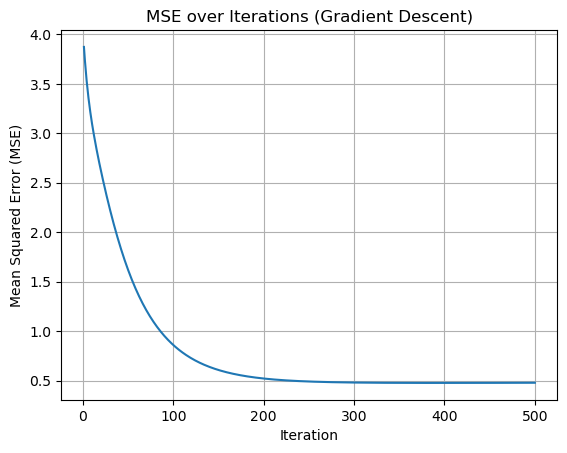

MSE for Gradient Descent: 0.47826244355906006
[[ 0.06951675]
 [-0.05143106]
 [-0.02861721]
 ...
 [-0.0021232 ]
 [ 0.02947726]
 [ 0.09331475]]
Accuracy: 0.5003571428571428


In [205]:
y = data.iloc[:, 10:].values
# Plot MSE over iterations
plt.plot(range(1, t + 1), mse_values)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE over Iterations (Gradient Descent)')
plt.grid()
plt.show()

print(f"MSE for Gradient Descent: {mse_values[t-1]}")
h_grad = np.dot(biased_X, grad_para)
print(h_grad)

def lin_cfr(grad_para, biased_X):
    h_grad = np.dot(biased_X, grad_para)
    return (h_grad > 0).astype(int)

lin_predicted = lin_cfr(grad_para, biased_X)

print(f"Accuracy: {np.sum(lin_predicted == y)/len(y)}")

# Parzen Window

In [207]:
file_name = 'binary_classification_data_group_19_train.txt'
x1 = []
x2 = []
x3 = []
x4 = []
x5 = []
x6 = []
x7 = []
x8 = []
x9 = []
x10 = []
y = []
with open(file_name,"r") as csvfile:
    reader_variable = csv.reader(csvfile,delimiter="\t")
    for row in reader_variable:
        x1.append(row[0])
        x2.append(row[1])
        x3.append(row[2])
        x4.append(row[3])
        x5.append(row[4])
        x6.append(row[5])
        x7.append(row[6])
        x8.append(row[7])
        x9.append(row[8])
        x10.append(row[9])
        y.append(row[10])
x1 = np.array([float(x) for x in x1[1:]])
x2 = np.array([float(x) for x in x2[1:]])
x3 = np.array([float(x) for x in x3[1:]])
x4 = np.array([float(x) for x in x4[1:]])
x5 = np.array([float(x) for x in x5[1:]])
x6 = np.array([float(x) for x in x6[1:]])
x7 = np.array([float(x) for x in x7[1:]])
x8 = np.array([float(x) for x in x8[1:]])
x9 = np.array([float(x) for x in x9[1:]])
x10 = np.array([float(x) for x in x10[1:]])

y = np.array([float(x) for x in y[1:]])

pred_y =np.array([0]*len(y),dtype = float)

Length of hypercube: 1 Accuracy: 0.57
Length of hypercube: 1.5 Accuracy: 0.7035
Length of hypercube: 2 Accuracy: 0.733
Length of hypercube: 2.5 Accuracy: 0.71625
Length of hypercube: 3 Accuracy: 0.67825


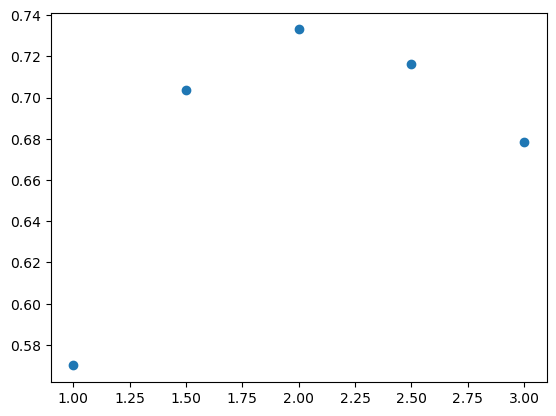

In [209]:
#defining hypercube based on l= length of hypercube and defining the window function

def window(x,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,l): #1st kernel: 0-1 kernel
    a1 = abs(x[0] - x1)/l
    a2 = abs(x[1] - x2)/l
    a3 = abs(x[2] - x3)/l
    a4 = abs(x[3] - x4)/l
    a5 = abs(x[4] - x5)/l
    a6 = abs(x[5] - x6)/l
    a7 = abs(x[6] - x7)/l
    a8 = abs(x[7] - x8)/l
    a9 = abs(x[8] - x9)/l
    a10 = abs(x[9] - x10)/l
    if a1<=0.5 and a2<=0.5 and a3<=0.5 and a4<=0.5 and a5<=0.5 and a6<=0.5 and a7<=0.5 and a8<=0.5 and a9<=0.5 and a10<=0.5:
        return 1
    else:
        return 0

l=5

def classifier(x,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y,l):
    n = len(x1)
    n=int(5*n/7)
    sum0 = 0
    sum1 = 0
    c0=0
    c1=0
    for i in range(n):
        if y[i]==0: # to calculate p(x|y=0)
            sum0 += window(x,x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],x9[i],x10[i],l)
            c0+=1
        else: # to calculate p(x|y=1)
            sum1 += window(x,x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],x9[i],x10[i],l)
            c1+=1
            
    ccd_0 = sum0/(c0*(l**10))
    ccd_1 = sum1/(c1*(l**10))
    if ccd_0*(c0/(c0+c1))>ccd_1*(c1/(c0+c1)): #p(y|x) is proportional to p(x|y)*p(y)
        return 0
    else:
        return 1

def testing(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y,l=1):
    n=len(y)
    correct = 0
    for i in range(int(5*n/7),n): #picking 4000 samples
        x=np.array([x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],x9[i],x10[i]])
        pred_y[i] = classifier(x,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y,l)
        if pred_y[i]==y[i]:
            correct+=1
    accuracy = 3.5*correct/n
    return (l,accuracy)

a=[0]*5
b=[0]*5

def accuracy_vs_length():
    l_arr = [1,1.5,2,2.5,3]
    for i in range(5):
        a[i],b[i] = testing(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y,l_arr[i])
        print("Length of hypercube:",a[i],"Accuracy:",b[i])

accuracy_vs_length()
            
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(a,b)

We notice a maxima at L=2, so for binary classification via discrete kernel, L=2 is the best length of hypercube

In [210]:
def window2(x,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,l):#Gaussian kernel with identity covariance matrix function
    a1 = abs(x[0] - x1)/l
    a2 = abs(x[1] - x2)/l
    a3 = abs(x[2] - x3)/l
    a4 = abs(x[3] - x4)/l
    a5 = abs(x[4] - x5)/l
    a6 = abs(x[5] - x6)/l
    a7 = abs(x[6] - x7)/l
    a8 = abs(x[7] - x8)/l
    a9 = abs(x[8] - x9)/l
    a10 = abs(x[9] - x10)/l
    norm = a1**2 + a2**2 + a3**2 + a4**2 + a5**2 + a6**2 + a7**2 + a8**2 + a9**2 + a10**2
    val = math.exp(-norm/2)/((2*math.pi)**5)
    return val

def classifier2(x,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y,l):
    n = len(x1)
    n=int(5*n/7)
    sum0 = 0
    sum1 = 0
    c0=0
    c1=0
    for i in range(n):
        if y[i]==0: # to calculate p(x|y=0)
            sum0 += window2(x,x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],x9[i],x10[i],l)
            c0+=1
        else: # to calculate p(x|y=1)
            sum1 += window2(x,x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],x9[i],x10[i],l)
            c1+=1
            
    ccd_0 = sum0/(c0*(l**10))
    ccd_1 = sum1/(c1*(l**10))
    if ccd_0*(c0/(c0+c1))>ccd_1*(c1/(c0+c1)): #p(y|x) is proportional to p(x|y)*p(y)
        return 0
    else:
        return 1
    

In [211]:
def testing2(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y,l=1):
    n=len(y)
    correct = 0
    for i in range(int(5*n/7),n): #picking 4000 samples
        x=np.array([x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],x9[i],x10[i]])
        pred_y[i] = classifier2(x,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y,l)
        if pred_y[i]==y[i]:
            correct+=1
    accuracy = 3.5*correct/n # as there are 2n/7 samples
    return (l,accuracy)

Length of std_dev: 1 Accuracy: 0.73875
Length of std_dev: 1.5 Accuracy: 0.71225
Length of std_dev: 2 Accuracy: 0.68325
Length of std_dev: 2.5 Accuracy: 0.66225
Length of std_dev: 3 Accuracy: 0.64025


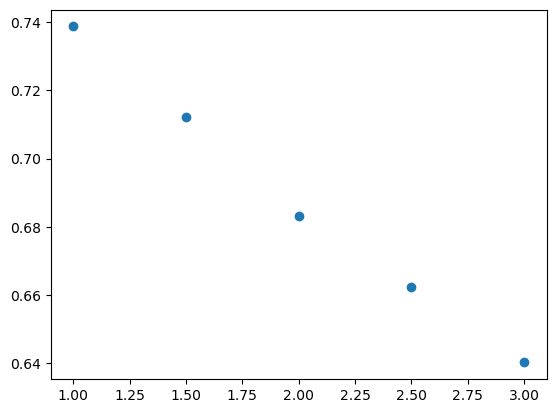

In [212]:
def accuracy_vs_length2(): #tuning the hyperparameter to see which value 
    l_arr = [1,1.5,2,2.5,3]
    for i in range(5):
        a[i],b[i] = testing2(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y,l_arr[i])
        print("Length of std_dev:",a[i],"Accuracy:",b[i])

accuracy_vs_length2()
            
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(a,b)

In [213]:
m,t = testing2(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y,0.5)
print("Length of std. dev:",m,"Accuracy:",t)

Length of std. dev: 0.5 Accuracy: 0.75875


In [214]:
m,t = testing2(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y,0.4)
print("Length of std. dev:",m,"Accuracy:",t)

Length of std. dev: 0.4 Accuracy: 0.74725


Confusion matrix:
 [[1571  587]
 [ 424 1418]] 

f1_score:  0.7565615217914761 

Classification accuracy for l = 0.9: 0.74525%


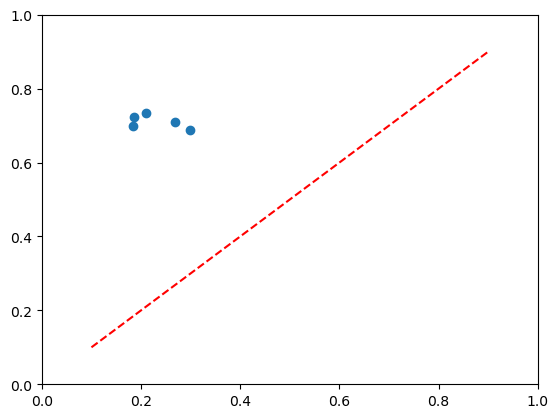

In [215]:
def confusion_matrix(pred_y,y,start,end):
    X = [[0]*2 for i in range(2)]
    for i in range(start,end):
        X[int(pred_y[i])][int(y[i])]+=1
    X = np.array(X)
    return X

def f1_score(pred_y,y,start,end):
    X = confusion_matrix(pred_y,y,start,end)
    f1_score = 0
    sum = 0
    sum += 2*X[0][0] + X[0][1] + X[1][0]
    f1_score = 2*X[0][0]/sum
    return f1_score

def roc_curve_bin(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y,start,end,param_list):
    tpr = []
    fpr = []
    d=0
    f=0
    for i in param_list:
        d,f = testing2(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y,i)
        X = confusion_matrix(pred_y,y,start,end)
        p = X[0][0] + X[0][1]
        n = X[1][1] + X[1][0]
        tpr.append(X[0][0]/p)
        fpr.append(X[1][0]/n)
    print(f"Classification accuracy for l = {d}: {f}%")
    fig = plt.figure()
    ax5 = fig.add_subplot()
    ax5.scatter(fpr,tpr)
    s = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    ax5.plot(s, s,"r--",label = "random classifier")
    #ax5.plot(fpr,fpr,"r--", label = "random classifier") #red linedenotes roc curve for random classifier
    ax5.set_xlim([0, 1])
    ax5.set_ylim([0, 1])

print("Confusion matrix:\n",confusion_matrix(pred_y,y,10000,14000),"\n") 
print("f1_score: ",f1_score(pred_y,y,10000,14000),"\n") 
roc_curve_bin(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y,10000,14000,[0.1,0.3,0.5,0.7,0.9]) #roc curves

# Question 5

In [216]:
file_name ="multi_class_classification_data_group_19_train.txt"
input = pd.read_csv(file_name, delimiter = "\t")
input.columns = [s.replace("feature","x") for s in input.columns]
input.columns = [s.replace("label","y") for s in input.columns]

# KNN

In [217]:
def euclidean(source, dest):
    sum = 0
    for i in range(len(source)):
        sum+= (source[i] - dest[i])**2
    return sum

def cosine(source, dest):
    return np.dot(source,dest)/(np.linalg.norm(source) * np.linalg.norm(dest))

In [218]:
nn_pred = [0]*datapoints
dist_arr = [0]*datapoints
def knn(x_train,y_train,x_test,y_test,knn_k, distance):
    print(knn_k)
    for i in range(datapoints): # for every test point, we check each train point
        print(f"i:{i}")
        for j in range(datapoints): # train points
            dist_arr[j] = distance(x_test[i,],x_train[j,])
            if dist_arr[j] == 0:
                dist_arr[j] == float("inf")
        dist_copy = sorted(dist_arr)
        nearest_neighbour_index = []
        for j in range(knn_k):
            nearest_neighbour_index.append(dist_arr.index(dist_copy[j]))
        print(nearest_neighbour_index)
        nn_given = [y_train[n] for n in nearest_neighbour_index]
        print(y_train[4861])
        sum = 0
        for j in range(knn_k):
            sum += nn_given[j]
        print(sum)
        if sum > knn_k/2:
            nn_pred[i] = 1
        else:
            nn_pred[i] = 0
    return nn_pred

# Parzen Window

In [247]:
file_name2 = 'multi_class_classification_data_group_19_train.txt'
X=[]
X_actual = []
Y=[]
c=0
with open(file_name2,"r") as csvfile:
    reader_variable = csv.reader(csvfile,delimiter="\t")
    for row in reader_variable:
        if c==0:
            c+=1
            pass
        else:
            X.append(row[:25])
            Y.append(int(row[25]))
for i in range(len(Y)):
    row = []
    for j in range(25):
        
        row.append(float(X[i][j]))
    X_actual.append(row)

X_actual[0][4] #check to match data with the text file

1.333086210939272

In [ ]:
def window_multi(x,X,l): #1st kernel: 0-1 kernel or discrete kernel
    dist = 0
    for i in range(25):
        dist = abs(x[i]-X[i])/l
        if dist > 0.5:
            return 0
    return 1

def window2_multi(x,X,l): #gaussian kernel
    norm = 0
    for i in range(25):
        norm+= (x[i]-X[i])**2
    norm/=l**2
    val = math.exp(-norm/2)/((2*math.pi)**0.5) #while d=25, normalization contant can be easily adjusted to make computation simpler
    return val


def multiclass_classifier(x,X_actual,Y,kernel,l):
    n = len(Y)
    n=int(6*n/7) #training on first 60000 samples
    sum=[0]*10
    c = [0]*10
    posterior = [0]*10
    if kernel == "discrete":
        for i in range(n):
            sum[Y[i]]+= window_multi(x,X_actual[i],l)
            c[Y[i]]+=1
                 
    elif kernel == "gaussian":
        for i in range(n):
            sum[Y[i]]+= window2_multi(x,X_actual[i],l)
            c[Y[i]]+=1
    for k in range(10):
        posterior[k]= sum[k]/n  #actual posterior includes p(x|y=k)*p(y=k) = sum[k]/(c[k]*l^25)*c[k]/n = sum[k]/(n*l^25), where we omit the l^25 for ease of calculation, and it cancels out in comprisions
    max = 0
    for k in range(1,10):
        if posterior[k]>posterior[max]:
            max=k
    #print(posterior,sum)
    return max

In [ ]:
pred_Y = np.array([0]*len(Y),dtype = float)
def testing_multi(X,Y,kernel,l=1):
    correct = 0
    n=len(Y)
    for i in range(int(6*n/7),60500): #picking 500 samples as test set (as gaussian kernel is very slow)
        pred_Y[i] = multiclass_classifier(X[i],X_actual,Y,kernel,l)
        #print(pred_Y[i],Y[i])
        if int(pred_Y[i])==Y[i]:
            correct+=1
    accuracy = correct/500 # as there are 500 samples
    print("Length of hypercube/variance in gaussian:",l,",Accuracy:",accuracy*100)
    return (l,accuracy*100)


In [ ]:
A=[]
B=[]
g=0
h=0

g,h=testing_multi(X_actual,Y,'discrete',1)
A.append(g)
B.append(h)
g,h=testing_multi(X_actual,Y,'discrete',2)
A.append(g)
B.append(h)
g,h=testing_multi(X_actual,Y,'discrete',2.5)
A.append(g)
B.append(h)
g,h=testing_multi(X_actual,Y,'discrete',2.8)
A.append(g)
B.append(h)
g,h=testing_multi(X_actual,Y,'discrete',3)
A.append(g)
B.append(h)
g,h=testing_multi(X_actual,Y,'discrete',3.5)
A.append(g)
B.append(h)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(A,B,label = "Accuracy vs length of hypercube")

In [ ]:
A1=[]
B1=[]
g=0
h=0

g,h=testing_multi(X_actual,Y,'gaussian',1)
A1.append(g)
B1.append(h)
g,h=testing_multi(X_actual,Y,'gaussian',2)
A1.append(g)
B1.append(h)
g,h=testing_multi(X_actual,Y,'gaussian',2.5)
A1.append(g)
B1.append(h)
g,h=testing_multi(X_actual,Y,'gaussian',2.8)
A1.append(g)
B1.append(h)
g,h=testing_multi(X_actual,Y,'gaussian',3)
A1.append(g)
B1.append(h)
g,h=testing_multi(X_actual,Y,'gaussian',3.5)
A1.append(g)
B1.append(h)

fig = plt.figure()
ax2 = fig.add_subplot()
ax2.scatter(A1,B1,label = "Accuracy vs length of hypercube")

In [ ]:
g,h=testing_multi(X_actual,Y,'gaussian',0.1)
A1.append(g)
B1.append(h)
g,h=testing_multi(X_actual,Y,'gaussian',0.3)
A1.append(g)
B1.append(h)
g,h=testing_multi(X_actual,Y,'gaussian',0.5)
A1.append(g)
B1.append(h)
g,h=testing_multi(X_actual,Y,'gaussian',0.7)
A1.append(g)
B1.append(h)
g,h=testing_multi(X_actual,Y,'gaussian',0.9)
A1.append(g)
B1.append(h)

In [ ]:
fig = plt.figure()
ax3 = fig.add_subplot()
ax3.scatter(A1,B1,label = "Accuracy vs length of hypercube")

In [ ]:
testing_multi(X_actual,Y,'gaussian',0.9)

In [ ]:
def confusion_matrix_multiclass(pred_Y,Y,start,end):
    X = [[0]*10 for i in range(10)]
    for i in range(start,end):
        X[int(pred_Y[i])][Y[i]]+=1
    X = np.array(X)
    return X

def class_wise_f1_score(pred_Y,Y,start,end):
    X = confusion_matrix_multiclass(pred_Y,Y,start,end)
    f1_score = [0]*10
    for i in range(10):
        sum=0
        for j in range(10):
            if j==i:
                pass
            else:    
                sum += 2*X[i][i] + X[i][j] + X[j][i]
        f1_score[i] = 2*X[i][i]/sum
    return f1_score

def roc_curve(Y,start,end,c1,c2,param_list):
    if c1>c2:
        c1,c2 = c2,c1 
    tpr = []
    fpr = []
    d=0
    f=0
    for i in param_list:
        d,f = testing_multi(X_actual,Y,'gaussian',i)
        X = confusion_matrix_multiclass(pred_Y,Y,start,end)
        p = X[c1][c1] + X[c1][c2]
        n = X[c2][c2] + X[c2][c1]
        tpr.append(X[c1][c1]/p)
        fpr.append(X[c2][c1]/n)
    print(f"Classification accuracy for l = {d}: {f}%")
    fig = plt.figure()
    ax5 = fig.add_subplot()
    ax5.scatter(fpr,tpr)
    s = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    ax5.plot(s, s,"r--",label = "random classifier")
    #ax5.plot(fpr,fpr,"r--", label = "random classifier") #red linedenotes roc curve for random classifier
    ax5.set_xlim([0, 1])
    ax5.set_ylim([0, 1])
    
print("Confusion matrix:\n",confusion_matrix_multiclass(pred_Y,Y,60000,60500),"\n") 
print("Class wise f1_score:\n",class_wise_f1_score(pred_Y,Y,60000,60500),"\n") 
roc_curve(Y,60000,60500,2,3,[0.1,0.3,0.5,0.7,0.9]) #roc curves

# Bayes Classifier

In [253]:
import numpy as np
import pandas as pd

# Load the data
data = pd.read_csv('multi_class_classification_data_group_19_train.txt', delimiter='\t')  # Update with the correct path

# Function to split data into train and test sets
def splitter(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    n_samples = X.shape[0]
    n_test = int(test_size * n_samples)
    test_indices = np.random.choice(n_samples, n_test, replace=False)
    train_indices = np.setdiff1d(np.arange(n_samples), test_indices)
    train_feat, test_feat = X[train_indices], X[test_indices]
    train_label, y_test = y[train_indices], y[test_indices]
    return train_feat, test_feat, train_label, y_test

# Function to calculate class-wise mean
def empirical_mean(X, y, label):
    return np.mean(X[y == label], axis=0)

# Function to calculate class-wise covariance matrix
def empirical_cov(X, y, label):
    return np.cov(X[y == label], rowvar=False)

# Function to calculate class priors
def priors(y):
    unique_classes, class_counts = np.unique(y, return_counts=True)
    return class_counts / len(y)

# Function to calculate Gaussian probability density function
def gauss_likelihood(x, mean, cov):
    n = x.shape[0]
    determinant_cov = np.linalg.det(cov)
    if determinant_cov == 0:
        cov += np.eye(n) * 1e-6  # Add a small regularization term
    inverse_cov = np.linalg.inv(cov)
    centered_X = x - mean
    exponent = -0.5 * np.dot(centered_X.T, np.dot(inverse_cov, centered_X))
    return (1.0 / ((2 * np.pi) ** (n/2) * np.sqrt(np.abs(determinant_cov)))) * np.exp(exponent)

# Function to predict class label using Bayes' classifiers
def h_bayes(X, empirical_means, empirical_covs, priors):
    n_samples, n_features = X.shape
    n_classes = len(empirical_means)
    predictions = []
    for i in range(n_samples):
        posterior_probs = []
        for j in range(n_classes):
            likelihood = gauss_likelihood(X[i], empirical_means[j], empirical_covs[j])
            posterior_probs.append(np.log(likelihood) + np.log(priors[j]))
        predicted_class = np.argmax(posterior_probs)
        predictions.append(predicted_class)
    return np.array(predictions)

# Function to implement one-versus-rest linear classifier
def one_vs_rest(train_feat, train_label, test_feat):
    unique_classes = np.unique(train_label)
    classifiers = {}
    for cls in unique_classes:
        train_label_ovr = np.where(train_label == cls, 1, 0)
        weights = np.linalg.pinv(train_feat.T @ train_feat) @ train_feat.T @ train_label_ovr
        classifiers[cls] = weights
    predictions = np.zeros((test_feat.shape[0], len(unique_classes)))
    for cls, weights in classifiers.items():
        predictions[:, cls] = test_feat @ weights
    return np.argmax(predictions, axis=1)

# Split the data into train and test sets
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
train_feat, test_feat, train_label, y_test = splitter(X, y, test_size=0.2, random_state=42)

# Calculate class-wise mean, covariance, and priors for Bayes' classifiers
empirical_means = [empirical_mean(train_feat, train_label, label) for label in np.unique(train_label)]
empirical_covs = [empirical_cov(train_feat, train_label, label) for label in np.unique(train_label)]
priors = priors(train_label)

# Predict using Bayes' classifiers
bayes_predictions = h_bayes(test_feat, empirical_means, empirical_covs, priors)

# Predict using one-versus-rest linear classifier
centered_X = one_vs_rest(train_feat, train_label, test_feat)

# Evaluation metrics
def accuracy(true_label, y_pred):
    return np.mean(true_label == y_pred)

def confusion_matrix(true_label, y_pred, n_classes):
    cm = np.zeros((n_classes, n_classes), dtype=int)
    for i in range(len(true_label)):
        cm[true_label[i], y_pred[i]] += 1
    return cm

def f1_score(conf_matrix):
    diagonal = conf_matrix.diagonal()
    precision = diagonal / conf_matrix.sum(axis=1)
    recall = diagonal / conf_matrix.sum(axis=0)
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

# Metrics:
bayes_accuracy = accuracy(y_test, bayes_predictions)
ovr_accuracy = accuracy(y_test, centered_X)
bayes_conf_matrix = confusion_matrix(y_test, bayes_predictions, len(np.unique(y)))
ovr_conf_matrix = confusion_matrix(y_test, centered_X, len(np.unique(y)))
bayes_f1 = f1_score(bayes_conf_matrix)
ovr_f1 = f1_score(ovr_conf_matrix)

print("Bayes' Classifier Accuracy:", bayes_accuracy)
print("One-vs-Rest Linear Classifier Accuracy:", ovr_accuracy)
print("Bayes' Classifier Confusion Matrix:\n", bayes_conf_matrix)
print("One-vs-Rest Linear Classifier Confusion Matrix:\n", ovr_conf_matrix)
print("Bayes' Classifier F1 Score:", bayes_f1)
print("One-vs-Rest Linear Classifier F1 Score:", ovr_f1)

Bayes' Classifier Accuracy: 0.4784285714285714
One-vs-Rest Linear Classifier Accuracy: 0.293
Bayes' Classifier Confusion Matrix:
 [[728  64 101  83  86  73  64  63  66  53]
 [ 96 656 100  92  89  72  65  68  72  65]
 [ 94  65 714  82 103  63  51  89  67  64]
 [120  74 129 564  80  67  84  62 100 102]
 [ 61  67  59  56 841  59  91  49  82  52]
 [105  67  99  93 117 546 112 111  66  98]
 [ 87  85  84  80 137 106 608 109  58  97]
 [ 73  66  67  72  61  78  83 736  54 105]
 [ 91 107 123  95 108  67  45  64 627  66]
 [ 68  81  97  82  87  77  64 102  64 678]]
One-vs-Rest Linear Classifier Confusion Matrix:
 [[537 117 126  73 105  64  15 135 118  91]
 [160 518  97  80 112  64  20  93 112 119]
 [164 129 425  73 100  53  13 162 127 146]
 [117 117  99 343 125  75  27 115 178 186]
 [162 125  98  89 526  66  65  89  91 106]
 [104 122 108 141 163 263  66 185  86 176]
 [143 155  87 124 271 130 114 172 120 135]
 [121  94  97 100  71  71  37 508 143 153]
 [145 129 155 124 117  47  20 134 395 127]
 [1